- input
  - results_*/processed/
- output
  - tables/* median tables
  - tables/* final data table
  - figures/* box plots 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools  # for cycling through colors if necessary
import glob
import re
import os

In [2]:
num_models = 5 #CHANGE
device = 'cpu'
path = f"D:/GAISSA/energy-repo/last_repo/june_{device}/"  # Adjust this path to your CSV files location #CHANGE
#save_figs = False
SAVE_FIGS = True
SAVE_TABLES = True

In [3]:
save_dir = path+"figures/"
tables_dir = path+"tables/"

try:
    os.mkdir(save_dir)
except Exception as e:
    print("could not create directory "+ save_dir )
    print(e)

try:
    os.mkdir(tables_dir)
except Exception as e:
    print("could not create directory "+ tables_dir )
    print(e)



could not create directory D:/GAISSA/energy-repo/last_repo/june_cpu/figures/
[WinError 183] Cannot create a file when that file already exists: 'D:/GAISSA/energy-repo/last_repo/june_cpu/figures/'
could not create directory D:/GAISSA/energy-repo/last_repo/june_cpu/tables/
[WinError 183] Cannot create a file when that file already exists: 'D:/GAISSA/energy-repo/last_repo/june_cpu/tables/'


In [4]:
def remove_condition_rows(condition_to_remove,df):
    # example: condition = merged_df['label']  == 'idle_idle'
    df1 = df.copy()
    return df1[~condition_to_remove]

In [5]:
def save_latex_table(df,save_dir):
    df = df.copy()
    df.columns = [col.replace('_', ' ') for col in df.columns]
    
    latex_table = df.to_latex(index=False)

    # Define the filename
    filename = save_dir
    
    # Open the file in write mode
    with open(filename, 'w') as file:
        file.write(latex_table) if SAVE_TABLES else print(f"SAVE_TABLES:{SAVE_TABLES}")
        
    # Print LaTeX table
    print(latex_table)

# RQ1.1: Energy

## Profilers used metrics previsualization

### Energibridge

In [6]:
# Path where the CSV files are stored
all_files_energi = glob.glob(path + "/results_*/processed/energi_processed.csv")
all_files_energi

['D:/GAISSA/energy-repo/last_repo/june_cpu\\results_1\\processed\\energi_processed.csv',
 'D:/GAISSA/energy-repo/last_repo/june_cpu\\results_10\\processed\\energi_processed.csv',
 'D:/GAISSA/energy-repo/last_repo/june_cpu\\results_2\\processed\\energi_processed.csv',
 'D:/GAISSA/energy-repo/last_repo/june_cpu\\results_3\\processed\\energi_processed.csv',
 'D:/GAISSA/energy-repo/last_repo/june_cpu\\results_4\\processed\\energi_processed.csv',
 'D:/GAISSA/energy-repo/last_repo/june_cpu\\results_5\\processed\\energi_processed.csv',
 'D:/GAISSA/energy-repo/last_repo/june_cpu\\results_6\\processed\\energi_processed.csv',
 'D:/GAISSA/energy-repo/last_repo/june_cpu\\results_7\\processed\\energi_processed.csv',
 'D:/GAISSA/energy-repo/last_repo/june_cpu\\results_8\\processed\\energi_processed.csv',
 'D:/GAISSA/energy-repo/last_repo/june_cpu\\results_9\\processed\\energi_processed.csv']

In [7]:
result_numbers = []

li = []
for my_file in all_files_energi:
    # The regex pattern to find "results_" followed by one or more digits
    df = pd.read_csv(my_file, index_col=None, header=0)
    
    match = re.search(r'results_(\d+)', my_file)
    if match:
        # Append the found number to the list
        result_numbers.append(int(match.group(1)))

    df['experiment'] = result_numbers[-1]
    li.append(df)

print(result_numbers)
# Combine all data into one DataFrame
energi_df = pd.concat(li, axis=0, ignore_index=True)
energi_df

[1, 10, 2, 3, 4, 5, 6, 7, 8, 9]


,time,runtime,model,CPU_ENERGY (J),TOTAL_MEMORY,TOTAL_SWAP,USED_MEMORY,USED_SWAP,AVG_CPU_USAGE_SAMP,label,avg_TOTAL_MEMORY,avg_TOTAL_SWAP,avg_USED_MEMORY,avg_USED_SWAP,avg_cpu_usage_config,energy,avg_used_memory_pct_config,experiment
0,2024-06-12 02:19:20.818,idle,idle,8.491076e+05,66575949824,2147479552,2730065920,0,6.485433,idle_idle,6.657595e+10,2.147480e+09,3.243619e+09,0.0,0.147192,5513.152359,4.872058,1
1,2024-06-12 02:19:20.818,idle,idle,8.491077e+05,66575949824,2147479552,2730582016,0,6.485433,idle_idle,6.657595e+10,2.147480e+09,3.243619e+09,0.0,0.147192,5513.152359,4.872058,1
2,2024-06-12 02:19:21.019,idle,idle,8.491217e+05,66575949824,2147479552,2799267840,0,6.403137,idle_idle,6.657595e+10,2.147480e+09,3.243619e+09,0.0,0.147192,5513.152359,4.872058,1
3,2024-06-12 02:19:21.219,idle,idle,8.491336e+05,66575949824,2147479552,2849468416,0,6.403137,idle_idle,6.657595e+10,2.147480e+09,3.243619e+09,0.0,0.147192,5513.152359,4.872058,1
4,2024-06-12 02:19:21.419,idle,idle,8.491456e+05,66575949824,2147479552,2896470016,0,5.833782,idle_idle,6.657595e+10,2.147480e+09,3.243619e+09,0.0,0.147192,5513.152359,4.872058,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1635232,2024-06-16 12:50:38.612,ov,phi2,3.335149e+07,66575949824,2147479552,12210618368,0,49.397322,ov_phi2,6.657595e+10,2.147480e+09,1.216167e+10,0.0,44.331846,443176.791641,18.267368,9
1635233,2024-06-16 12:50:38.812,ov,phi2,3.335153e+07,66575949824,2147479552,12210876416,0,49.687500,ov_phi2,6.657595e+10,2.147480e+09,1.216167e+10,0.0,44.331846,443176.791641,18.267368,9
1635234,2024-06-16 12:50:39.013,ov,phi2,3.335155e+07,66575949824,2147479552,12211134464,0,16.903979,ov_phi2,6.657595e+10,2.147480e+09,1.216167e+10,0.0,44.331846,443176.791641,18.267368,9
1635235,2024-06-16 12:50:39.213,ov,phi2,3.335155e+07,66575949824,2147479552,12211134464,0,0.000000,ov_phi2,6.657595e+10,2.147480e+09,1.216167e+10,0.0,44.331846,443176.791641,18.267368,9


In [8]:
# ## add "experiment" column 1,2...10

# # List to hold data from each file
# li = []

# # Read each file and append to list
# n=1
# for filename in all_files_energi:
#     df = pd.read_csv(filename, index_col=None, header=0)
#     df['experiment'] = n
#     li.append(df)
#     n+=1
    

# # Combine all data into one DataFrame
# energi_df = pd.concat(li, axis=0, ignore_index=True)
# energi_df

In [9]:
energi_df.columns

Index(['time', 'runtime', 'model', 'CPU_ENERGY (J)', 'TOTAL_MEMORY',
       'TOTAL_SWAP', 'USED_MEMORY', 'USED_SWAP', 'AVG_CPU_USAGE_SAMP', 'label',
       'avg_TOTAL_MEMORY', 'avg_TOTAL_SWAP', 'avg_USED_MEMORY',
       'avg_USED_SWAP', 'avg_cpu_usage_config', 'energy',
       'avg_used_memory_pct_config', 'experiment'],
      dtype='object')

In [10]:
energi_df.columns

Index(['time', 'runtime', 'model', 'CPU_ENERGY (J)', 'TOTAL_MEMORY',
       'TOTAL_SWAP', 'USED_MEMORY', 'USED_SWAP', 'AVG_CPU_USAGE_SAMP', 'label',
       'avg_TOTAL_MEMORY', 'avg_TOTAL_SWAP', 'avg_USED_MEMORY',
       'avg_USED_SWAP', 'avg_cpu_usage_config', 'energy',
       'avg_used_memory_pct_config', 'experiment'],
      dtype='object')

In [11]:
energi_df

,time,runtime,model,CPU_ENERGY (J),TOTAL_MEMORY,TOTAL_SWAP,USED_MEMORY,USED_SWAP,AVG_CPU_USAGE_SAMP,label,avg_TOTAL_MEMORY,avg_TOTAL_SWAP,avg_USED_MEMORY,avg_USED_SWAP,avg_cpu_usage_config,energy,avg_used_memory_pct_config,experiment
0,2024-06-12 02:19:20.818,idle,idle,8.491076e+05,66575949824,2147479552,2730065920,0,6.485433,idle_idle,6.657595e+10,2.147480e+09,3.243619e+09,0.0,0.147192,5513.152359,4.872058,1
1,2024-06-12 02:19:20.818,idle,idle,8.491077e+05,66575949824,2147479552,2730582016,0,6.485433,idle_idle,6.657595e+10,2.147480e+09,3.243619e+09,0.0,0.147192,5513.152359,4.872058,1
2,2024-06-12 02:19:21.019,idle,idle,8.491217e+05,66575949824,2147479552,2799267840,0,6.403137,idle_idle,6.657595e+10,2.147480e+09,3.243619e+09,0.0,0.147192,5513.152359,4.872058,1
3,2024-06-12 02:19:21.219,idle,idle,8.491336e+05,66575949824,2147479552,2849468416,0,6.403137,idle_idle,6.657595e+10,2.147480e+09,3.243619e+09,0.0,0.147192,5513.152359,4.872058,1
4,2024-06-12 02:19:21.419,idle,idle,8.491456e+05,66575949824,2147479552,2896470016,0,5.833782,idle_idle,6.657595e+10,2.147480e+09,3.243619e+09,0.0,0.147192,5513.152359,4.872058,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1635232,2024-06-16 12:50:38.612,ov,phi2,3.335149e+07,66575949824,2147479552,12210618368,0,49.397322,ov_phi2,6.657595e+10,2.147480e+09,1.216167e+10,0.0,44.331846,443176.791641,18.267368,9
1635233,2024-06-16 12:50:38.812,ov,phi2,3.335153e+07,66575949824,2147479552,12210876416,0,49.687500,ov_phi2,6.657595e+10,2.147480e+09,1.216167e+10,0.0,44.331846,443176.791641,18.267368,9
1635234,2024-06-16 12:50:39.013,ov,phi2,3.335155e+07,66575949824,2147479552,12211134464,0,16.903979,ov_phi2,6.657595e+10,2.147480e+09,1.216167e+10,0.0,44.331846,443176.791641,18.267368,9
1635235,2024-06-16 12:50:39.213,ov,phi2,3.335155e+07,66575949824,2147479552,12211134464,0,0.000000,ov_phi2,6.657595e+10,2.147480e+09,1.216167e+10,0.0,44.331846,443176.791641,18.267368,9


In [12]:
# phi2 model had errors in gpu

#condition = energi_df['label'].str.endswith('phi2')

#energi_plot = remove_condition_rows( condition, energi_df)
energi_plot = energi_df

#energi_plot

In [13]:
#condition = energi_plot['label'].str.endswith('idle')

#energi_plot = remove_condition_rows( condition, energi_plot)
#energi_plot

In [14]:
#energi_plot.rename(columns={'energy': 'Energy (Energibridge) [J]'}, inplace=True)
#energi_plot.rename(columns={'AVG_CPU_USAGE_CONFIG': 'CPU usage (Energibridge) [%]'}, inplace=True)
#energi_plot.rename(columns={'avg_USED_MEMORY': 'Used memory (Energibridge) [B]'}, inplace=True)


In [15]:
energi_plot.columns

Index(['time', 'runtime', 'model', 'CPU_ENERGY (J)', 'TOTAL_MEMORY',
       'TOTAL_SWAP', 'USED_MEMORY', 'USED_SWAP', 'AVG_CPU_USAGE_SAMP', 'label',
       'avg_TOTAL_MEMORY', 'avg_TOTAL_SWAP', 'avg_USED_MEMORY',
       'avg_USED_SWAP', 'avg_cpu_usage_config', 'energy',
       'avg_used_memory_pct_config', 'experiment'],
      dtype='object')

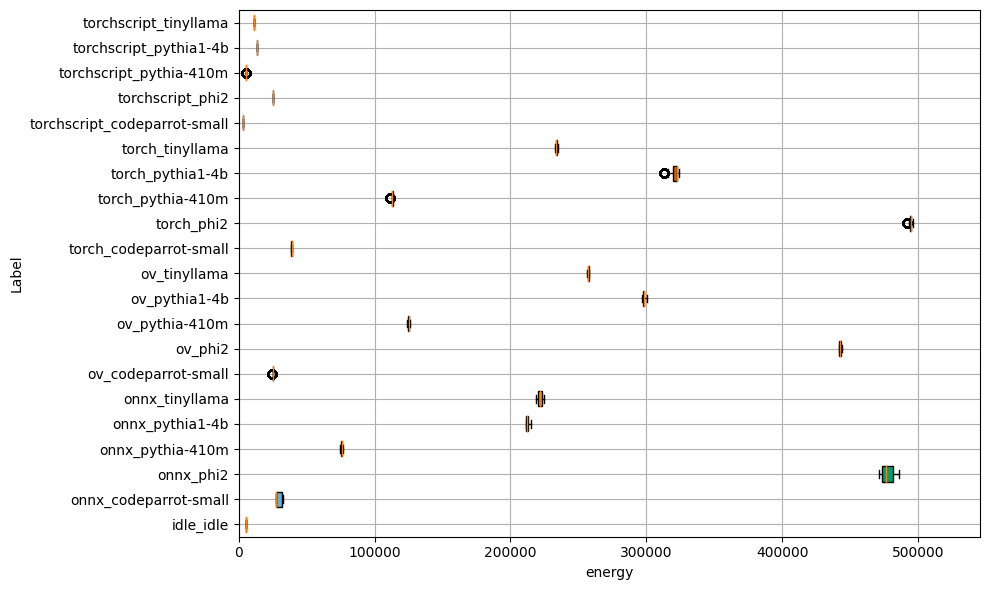

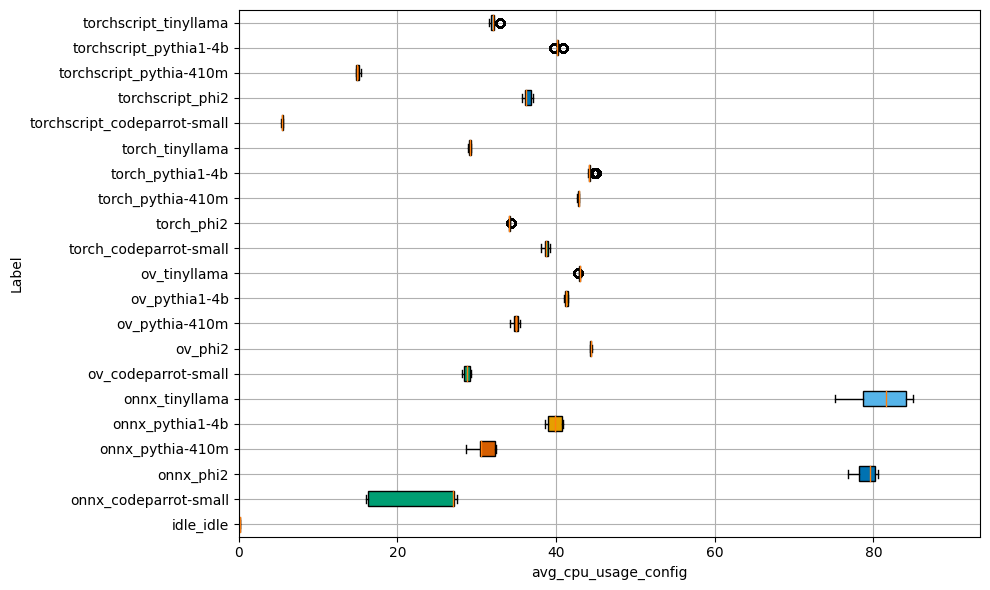

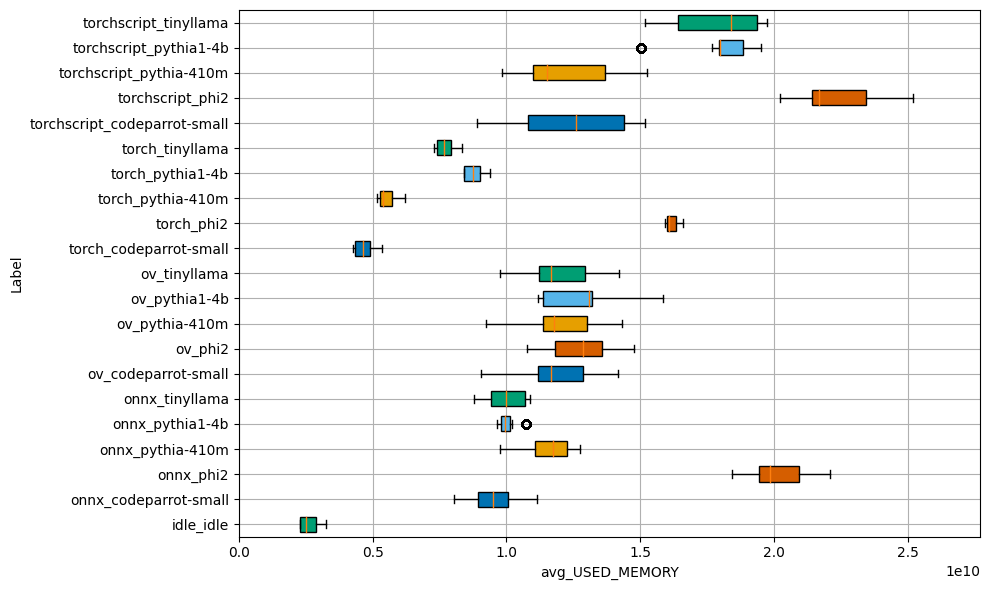

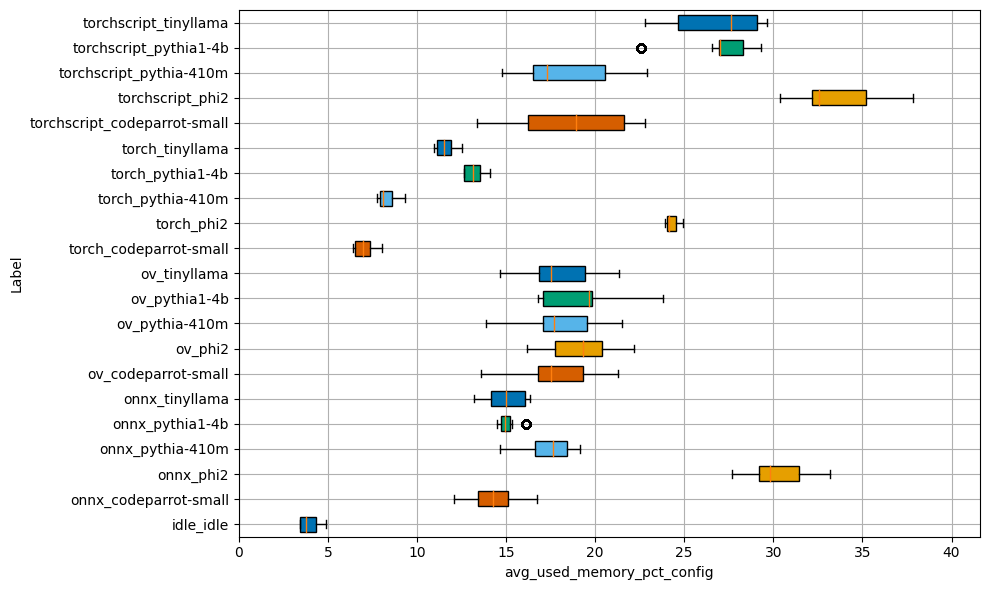

In [16]:


# Assuming combined_df is already created and contains the data
#variables_to_plot = ['diff_CPU_ENERGY (J)', 'avg_diff_CPU_ENERGY (J)', 'avg_TOTAL_MEMORY', 'minus_avg_USED_MEMORY', 'avg_TOTAL_SWAP']

variables_to_plot = [ 'Energy (Energibridge) [J]', "CPU usage (Energibridge) [%]",  'Used memory (Energibridge) [B]',]
variables_to_plot = [ 'energy', "avg_cpu_usage_config",  'avg_USED_MEMORY','avg_used_memory_pct_config']

# Define some colors for the boxes
colors = ['blue', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'orange', 'yellow', 'cyan']
colors=["#E69F00", "#56B4E9", "#009E73", "#0072B2", "#D55E00", "#CC79A7", "#F0E442"]
colors = colors[:num_models]
# Make the color list cyclic in case there are more groups than colors
color_cycle = itertools.cycle(colors)

# Generate box plots
for variable in variables_to_plot:
    plt.figure(figsize=(10, 6))
    
    # Group data by 'label' : runtime_model
    grouped = energi_plot.groupby('label')
    
    # We need to know the number of groups
    num_groups = len(grouped)
    
    # Creating a box for each group
    for i, (name, group) in enumerate(grouped):
        # Plot only the part of the data for this group
        # `positions` gives the position of the box in the plot
        plt.boxplot(group[variable].dropna(), positions=[i], widths=0.6, vert=False, patch_artist=True,
                    boxprops=dict(facecolor=next(color_cycle)))  # Use cyclic color

    # Customizing plot
    #plt.title(f'Box Plot of {variable} by Label')
    plt.xlabel(variable)
    plt.xlim([0,energi_plot[variable].max()*1.1])
    
    plt.yticks(np.arange(num_groups), grouped.groups.keys())  # Set y-ticks to group names
    plt.ylabel('Label')
    plt.grid(True)
    plt.tight_layout()  # Adjust layout to make room for labels
    #plt.savefig(save_dir+"energi_"+variable)

plt.show()


In [17]:
#energi_df.loc[energi_df['experiment'] == 10] 


### Nvidia

In [18]:
# Path where the CSV files are stored
path = f"D:/GAISSA/energy-repo/last_repo/june_{device}/"  # Adjust this path to your CSV files location
all_files_nvidia = glob.glob(path + "/results_*/processed/nvidia*_processed.csv")
all_files_nvidia

['D:/GAISSA/energy-repo/last_repo/june_cpu\\results_1\\processed\\nvidia_processed.csv',
 'D:/GAISSA/energy-repo/last_repo/june_cpu\\results_10\\processed\\nvidia_processed.csv',
 'D:/GAISSA/energy-repo/last_repo/june_cpu\\results_2\\processed\\nvidia_processed.csv',
 'D:/GAISSA/energy-repo/last_repo/june_cpu\\results_3\\processed\\nvidia_processed.csv',
 'D:/GAISSA/energy-repo/last_repo/june_cpu\\results_4\\processed\\nvidia_processed.csv',
 'D:/GAISSA/energy-repo/last_repo/june_cpu\\results_5\\processed\\nvidia_processed.csv',
 'D:/GAISSA/energy-repo/last_repo/june_cpu\\results_6\\processed\\nvidia_processed.csv',
 'D:/GAISSA/energy-repo/last_repo/june_cpu\\results_7\\processed\\nvidia_processed.csv',
 'D:/GAISSA/energy-repo/last_repo/june_cpu\\results_8\\processed\\nvidia_processed.csv',
 'D:/GAISSA/energy-repo/last_repo/june_cpu\\results_9\\processed\\nvidia_processed.csv']

In [19]:
result_numbers = []

li = []
for my_file in all_files_nvidia:
    # The regex pattern to find "results_" followed by one or more digits
    df = pd.read_csv(my_file, index_col=None, header=0)
    
    match = re.search(r'results_(\d+)', my_file)
    if match:
        # Append the found number to the list
        result_numbers.append(int(match.group(1)))

    df['experiment'] = result_numbers[-1]
    li.append(df)

print(result_numbers)
# Combine all data into one DataFrame
nvidia_df = pd.concat(li, axis=0, ignore_index=True)
nvidia_df

[1, 10, 2, 3, 4, 5, 6, 7, 8, 9]


,time,runtime,model,utilization.gpu [%],utilization.memory [%],memory.total [MiB],memory.used [MiB],power.draw [W],power.max_limit [W],temperature.gpu,...,used_memory_pct_mib,avg_utilization_gpu_config,avg_utilization_memory_config,avg_memory_used_config,avg_power_draw_config,avg_temperature_gpu_config,avg_used_memory_pct_mib,config_duration,energy,experiment
0,2024-06-12 02:24:20.894,torch,pythia1-4b,0,0,24564,65,19.39,500.0,45,...,0.264615,0.005282,0.000058,83.304312,19.191973,44.111150,0.339132,3466.257,66524.312200,1
1,2024-06-12 02:24:20.997,torch,pythia1-4b,0,0,24564,65,19.39,500.0,45,...,0.264615,0.005282,0.000058,83.304312,19.191973,44.111150,0.339132,3466.257,66524.312200,1
2,2024-06-12 02:24:21.097,torch,pythia1-4b,0,0,24564,65,19.39,500.0,45,...,0.264615,0.005282,0.000058,83.304312,19.191973,44.111150,0.339132,3466.257,66524.312200,1
3,2024-06-12 02:24:21.198,torch,pythia1-4b,0,0,24564,65,19.39,500.0,45,...,0.264615,0.005282,0.000058,83.304312,19.191973,44.111150,0.339132,3466.257,66524.312200,1
4,2024-06-12 02:24:21.299,torch,pythia1-4b,0,0,24564,65,19.43,500.0,45,...,0.264615,0.005282,0.000058,83.304312,19.191973,44.111150,0.339132,3466.257,66524.312200,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3221086,2024-06-16 12:50:38.988,ov,phi2,0,0,24564,83,19.10,500.0,37,...,0.337893,0.000084,0.000000,83.000000,19.032492,37.567734,0.337893,2401.964,45715.361205,9
3221087,2024-06-16 12:50:39.089,ov,phi2,0,0,24564,83,19.14,500.0,37,...,0.337893,0.000084,0.000000,83.000000,19.032492,37.567734,0.337893,2401.964,45715.361205,9
3221088,2024-06-16 12:50:39.190,ov,phi2,0,0,24564,83,19.14,500.0,37,...,0.337893,0.000084,0.000000,83.000000,19.032492,37.567734,0.337893,2401.964,45715.361205,9
3221089,2024-06-16 12:50:39.291,ov,phi2,0,0,24564,83,19.14,500.0,37,...,0.337893,0.000084,0.000000,83.000000,19.032492,37.567734,0.337893,2401.964,45715.361205,9


In [20]:
# ## add number of experiment

# # List to hold data from each file
# li = []

# # Read each file and append to list
# n=1
# for filename in all_files_nvidia:
#     df = pd.read_csv(filename, index_col=None, header=0)
#     df['experiment'] = n
#     li.append(df)
#     n+=1
    

# # Combine all data into one DataFrame
# nvidia_df = pd.concat(li, axis=0, ignore_index=True)
# nvidia_df

In [21]:
nvidia_df.columns

Index(['time', 'runtime', 'model', ' utilization.gpu [%]',
       ' utilization.memory [%]', ' memory.total [MiB]', ' memory.used [MiB]',
       ' power.draw [W]', ' power.max_limit [W]', ' temperature.gpu', 'label',
       'used_memory_pct_mib', 'avg_utilization_gpu_config',
       'avg_utilization_memory_config', 'avg_memory_used_config',
       'avg_power_draw_config', 'avg_temperature_gpu_config',
       'avg_used_memory_pct_mib', 'config_duration', 'energy', 'experiment'],
      dtype='object')

In [22]:
#variables_to_plot = ['diff_CPU_ENERGY (J)','avg_diff_CPU_ENERGY (J)', 'avg_TOTAL_MEMORY', 'avg_TOTAL_SWAP', 'minus_avg_USED_MEMORY', 'minus_avg_USED_SWAP',]
# nvidia variables to plot
#variables_to_plot = ['energy','config_duration','avg_ utilization.gpu [%]','avg_ utilization.memory [%]','avg_ memory.used [MiB]' ,'avg_ temperature.gpu']

#variables_to_plot

In [23]:
#condition = nvidia_df['label'].str.endswith('phi2')
#nvidia_plot = remove_condition_rows( condition, nvidia_df)
nvidia_plot = nvidia_df
nvidia_plot


,time,runtime,model,utilization.gpu [%],utilization.memory [%],memory.total [MiB],memory.used [MiB],power.draw [W],power.max_limit [W],temperature.gpu,...,used_memory_pct_mib,avg_utilization_gpu_config,avg_utilization_memory_config,avg_memory_used_config,avg_power_draw_config,avg_temperature_gpu_config,avg_used_memory_pct_mib,config_duration,energy,experiment
0,2024-06-12 02:24:20.894,torch,pythia1-4b,0,0,24564,65,19.39,500.0,45,...,0.264615,0.005282,0.000058,83.304312,19.191973,44.111150,0.339132,3466.257,66524.312200,1
1,2024-06-12 02:24:20.997,torch,pythia1-4b,0,0,24564,65,19.39,500.0,45,...,0.264615,0.005282,0.000058,83.304312,19.191973,44.111150,0.339132,3466.257,66524.312200,1
2,2024-06-12 02:24:21.097,torch,pythia1-4b,0,0,24564,65,19.39,500.0,45,...,0.264615,0.005282,0.000058,83.304312,19.191973,44.111150,0.339132,3466.257,66524.312200,1
3,2024-06-12 02:24:21.198,torch,pythia1-4b,0,0,24564,65,19.39,500.0,45,...,0.264615,0.005282,0.000058,83.304312,19.191973,44.111150,0.339132,3466.257,66524.312200,1
4,2024-06-12 02:24:21.299,torch,pythia1-4b,0,0,24564,65,19.43,500.0,45,...,0.264615,0.005282,0.000058,83.304312,19.191973,44.111150,0.339132,3466.257,66524.312200,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3221086,2024-06-16 12:50:38.988,ov,phi2,0,0,24564,83,19.10,500.0,37,...,0.337893,0.000084,0.000000,83.000000,19.032492,37.567734,0.337893,2401.964,45715.361205,9
3221087,2024-06-16 12:50:39.089,ov,phi2,0,0,24564,83,19.14,500.0,37,...,0.337893,0.000084,0.000000,83.000000,19.032492,37.567734,0.337893,2401.964,45715.361205,9
3221088,2024-06-16 12:50:39.190,ov,phi2,0,0,24564,83,19.14,500.0,37,...,0.337893,0.000084,0.000000,83.000000,19.032492,37.567734,0.337893,2401.964,45715.361205,9
3221089,2024-06-16 12:50:39.291,ov,phi2,0,0,24564,83,19.14,500.0,37,...,0.337893,0.000084,0.000000,83.000000,19.032492,37.567734,0.337893,2401.964,45715.361205,9


In [24]:
#condition = nvidia_plot['label'].str.endswith('idle')

#nvidia_plot = remove_condition_rows( condition, nvidia_plot)
#nvidia_plot


In [25]:
# #variables_to_plot = ['energy','config_duration','avg_ utilization.gpu [%]','avg_ utilization.memory [%]','avg_ memory.used [MiB]' ,'avg_ temperature.gpu']

# nvidia_plot.rename(columns={'energy': 'Energy (Nvidia-smi) [J]'}, inplace=True)
# nvidia_plot.rename(columns={'config_duration': 'Execution time (Nvidia-smi) [s]'}, inplace=True)
# nvidia_plot.rename(columns={'avg_ utilization.gpu [%]': 'GPU usage (Nvidia-smi) [%]'}, inplace=True)
# nvidia_plot.rename(columns={'avg_ utilization.memory [%]': 'Used memory (Nvidia-smi) [%]'}, inplace=True)
# nvidia_plot.rename(columns={'avg_ memory.used [MiB]': 'Used GPU memory (Nvidia-smi) [MiB]'}, inplace=True)
# nvidia_plot.rename(columns={'avg_ temperature.gpu': 'GPU temperature (Nvidia-smi) [°]'}, inplace=True)

# variables_to_plot = ['Energy (Nvidia-smi) [J]','Execution time (Nvidia-smi) [s]','GPU usage (Nvidia-smi) [%]','Used memory (Nvidia-smi) [%]','Used GPU memory (Nvidia-smi) [MiB]' ,'GPU temperature (Nvidia-smi) [°]']


In [26]:
nvidia_plot.columns

Index(['time', 'runtime', 'model', ' utilization.gpu [%]',
       ' utilization.memory [%]', ' memory.total [MiB]', ' memory.used [MiB]',
       ' power.draw [W]', ' power.max_limit [W]', ' temperature.gpu', 'label',
       'used_memory_pct_mib', 'avg_utilization_gpu_config',
       'avg_utilization_memory_config', 'avg_memory_used_config',
       'avg_power_draw_config', 'avg_temperature_gpu_config',
       'avg_used_memory_pct_mib', 'config_duration', 'energy', 'experiment'],
      dtype='object')

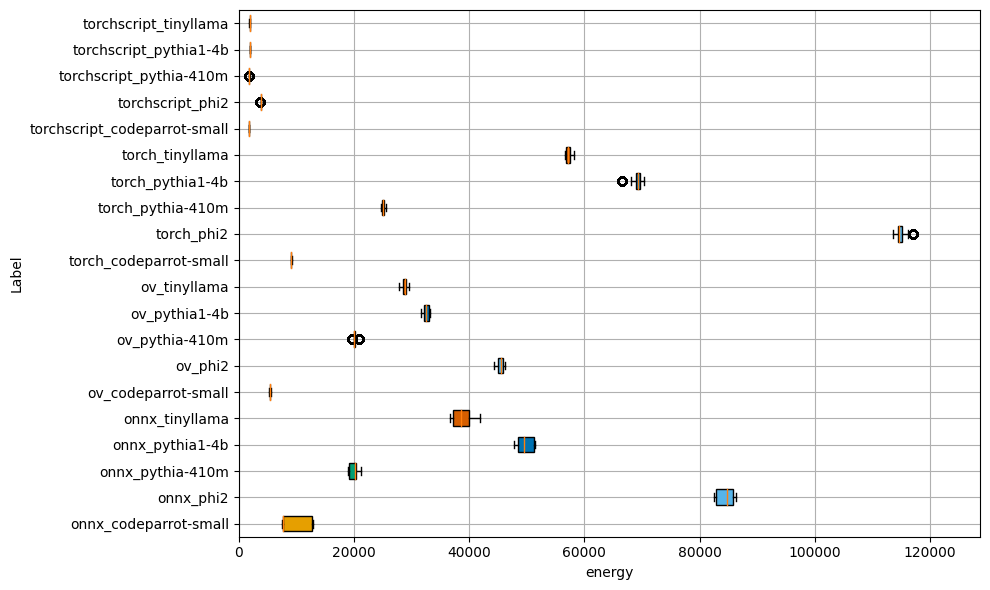

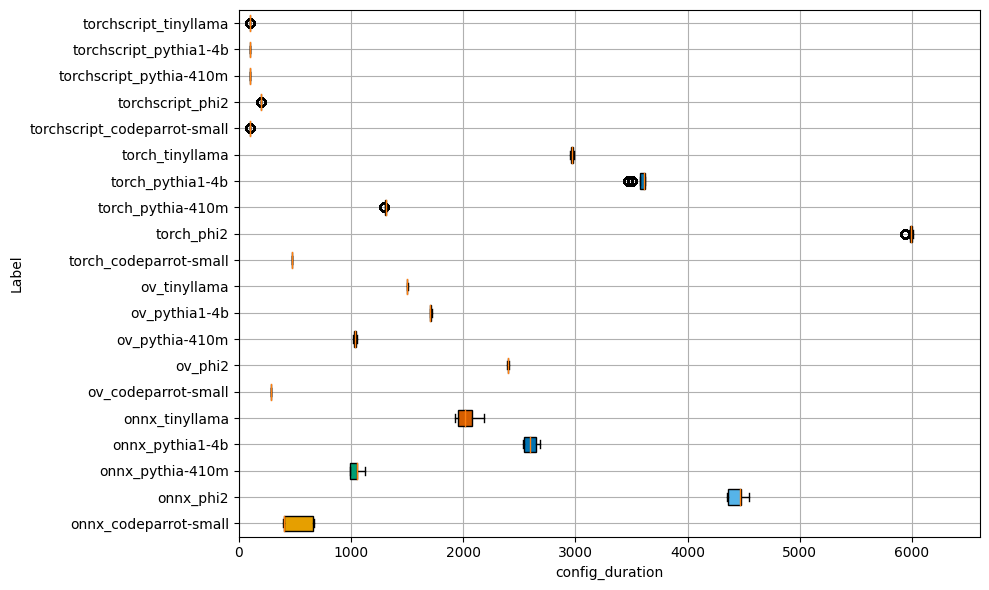

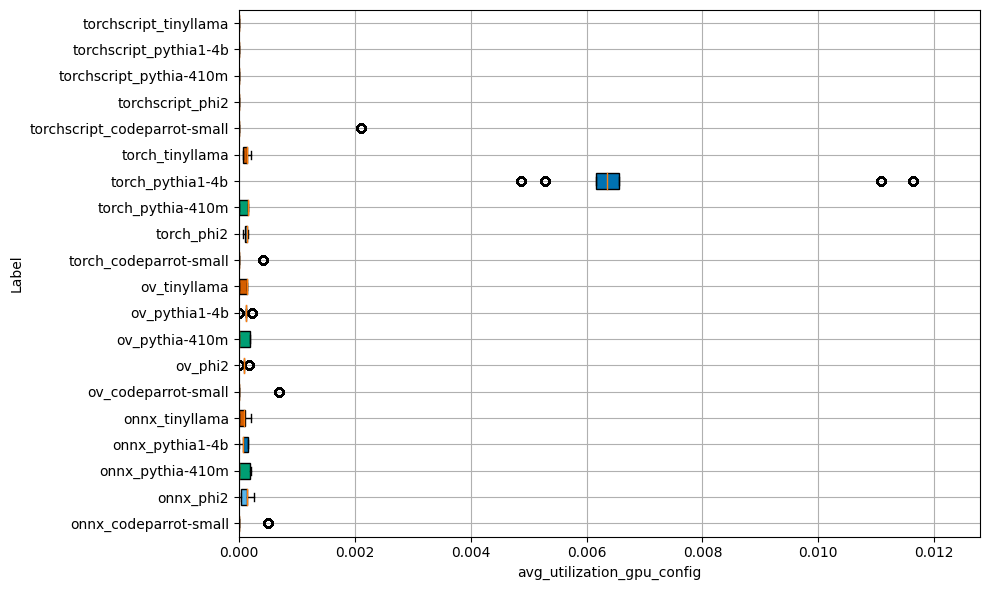

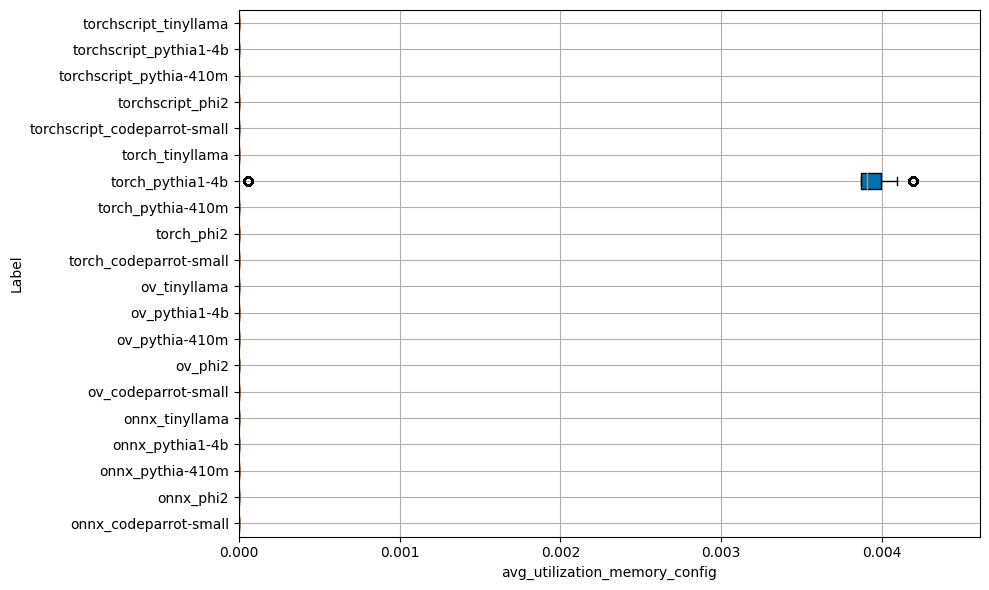

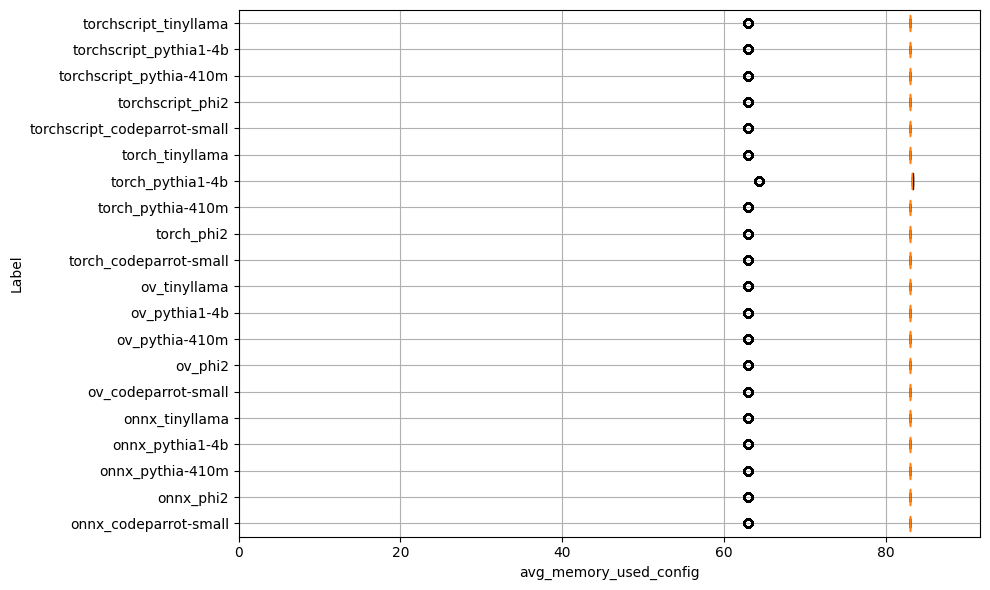

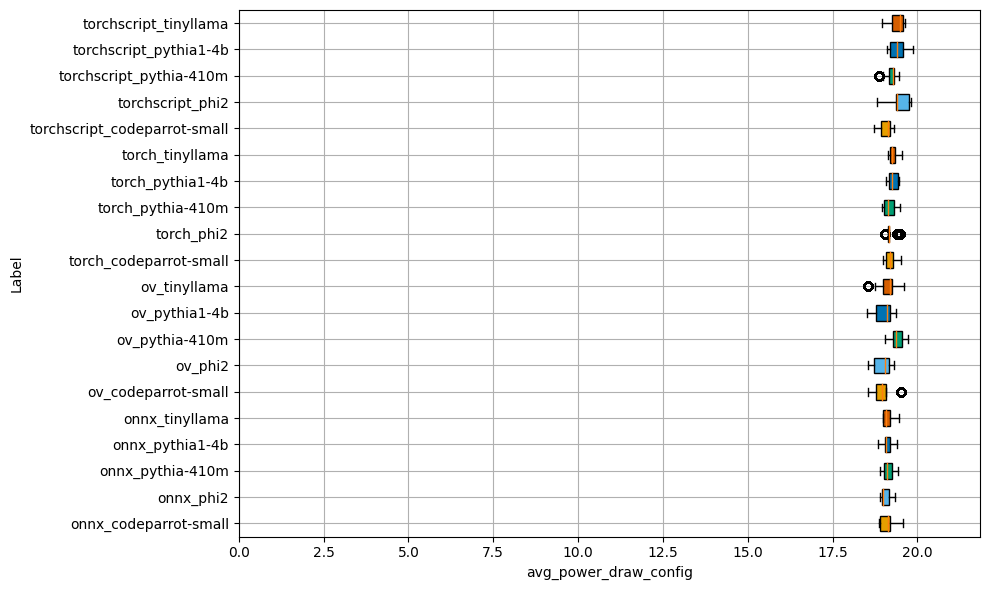

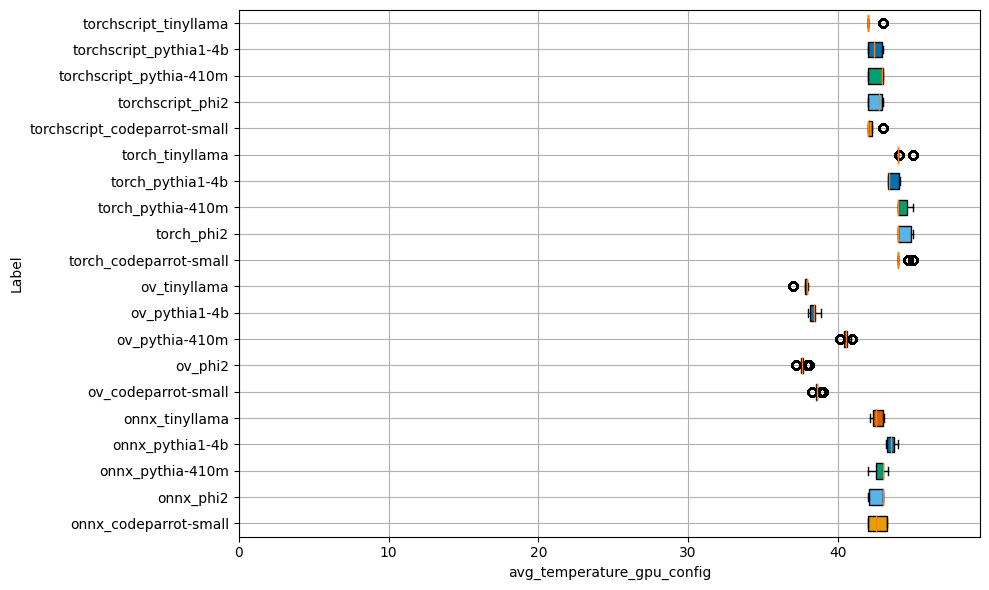

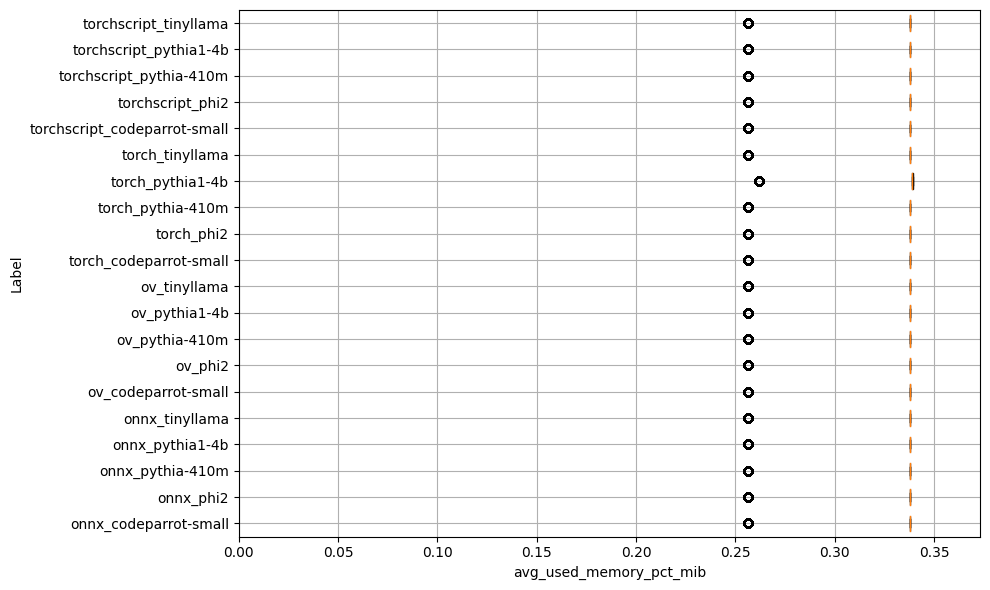

In [27]:

# Define some colors for the boxes
colors = ['blue', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'orange', 'yellow', 'cyan']
colors=["#E69F00", "#56B4E9", "#009E73", "#0072B2", "#D55E00", "#CC79A7", "#F0E442"]
colors = colors[:num_models]

# Make the color list cyclic in case there are more groups than colors
color_cycle = itertools.cycle(colors)

#variables_to_plot = ['energy','config_duration','avg_ utilization.gpu [%]','avg_ utilization.memory [%]','avg_ memory.used [MiB]' ,'avg_ temperature.gpu']
#variables_to_plot = ['Energy (Nvidia-smi) [J]','Execution time (Nvidia-smi) [s]','GPU usage (Nvidia-smi) [%]','Used memory (Nvidia-smi) [%]','Used GPU memory (Nvidia-smi) [MiB]' ,'GPU temperature (Nvidia-smi) [°]']
variables_to_plot = ['energy','config_duration','avg_utilization_gpu_config','avg_utilization_memory_config','avg_memory_used_config' ,
                     'avg_power_draw_config','avg_temperature_gpu_config','avg_used_memory_pct_mib']



n=0
# Generate box plots
for variable in variables_to_plot:
    plt.figure(figsize=(10, 6))
    
    # Group data by 'label'
    grouped = nvidia_plot.groupby('label')
    
    # We need to know the number of groups
    num_groups = len(grouped)
    
    # Creating a box for each group
    for i, (name, group) in enumerate(grouped):
        # Plot only the part of the data for this group
        # `positions` gives the position of the box in the plot
        plt.boxplot(group[variable].dropna(), positions=[i], widths=0.6, vert=False, patch_artist=True,
                    boxprops=dict(facecolor=next(color_cycle)))  # Use cyclic color

    # Customizing plot
    #plt.title(f'Box Plot of {variable} by Label')
    plt.xlabel(variable)
    plt.yticks(np.arange(num_groups), grouped.groups.keys())  # Set y-ticks to group names
    plt.ylabel('Label')

    plt.xlim([0,nvidia_plot[variable].max()*1.1])
    plt.grid(True)
    
    plt.tight_layout()  # Adjust layout to make room for labels
    
    #plt.savefig(save_dir + "nvidia_"+variable)
    n+=1
plt.show()


### Wattmeter

In [28]:
# Path where the CSV files are stored
path = f"D:/GAISSA/energy-repo/last_repo/june_{device}/"  # Adjust this path to your CSV files location
all_files_wattmeter = glob.glob(path + "/results_*/processed/wattmeter*_processed.csv")
all_files_wattmeter

['D:/GAISSA/energy-repo/last_repo/june_cpu\\results_1\\processed\\wattmeter_processed.csv',
 'D:/GAISSA/energy-repo/last_repo/june_cpu\\results_10\\processed\\wattmeter_processed.csv',
 'D:/GAISSA/energy-repo/last_repo/june_cpu\\results_2\\processed\\wattmeter_processed.csv',
 'D:/GAISSA/energy-repo/last_repo/june_cpu\\results_3\\processed\\wattmeter_processed.csv',
 'D:/GAISSA/energy-repo/last_repo/june_cpu\\results_4\\processed\\wattmeter_processed.csv',
 'D:/GAISSA/energy-repo/last_repo/june_cpu\\results_5\\processed\\wattmeter_processed.csv',
 'D:/GAISSA/energy-repo/last_repo/june_cpu\\results_6\\processed\\wattmeter_processed.csv',
 'D:/GAISSA/energy-repo/last_repo/june_cpu\\results_7\\processed\\wattmeter_processed.csv',
 'D:/GAISSA/energy-repo/last_repo/june_cpu\\results_8\\processed\\wattmeter_processed.csv',
 'D:/GAISSA/energy-repo/last_repo/june_cpu\\results_9\\processed\\wattmeter_processed.csv']

In [29]:
result_numbers = []

li = []
for my_file in all_files_wattmeter:
    # The regex pattern to find "results_" followed by one or more digits
    df = pd.read_csv(my_file, index_col=None, header=0)
    
    match = re.search(r'results_(\d+)', my_file)
    if match:
        # Append the found number to the list
        result_numbers.append(int(match.group(1)))

    df['experiment'] = result_numbers[-1]
    li.append(df)

print(result_numbers)
# Combine all data into one DataFrame
wattmeter_df = pd.concat(li, axis=0, ignore_index=True)
wattmeter_df

[1, 10, 2, 3, 4, 5, 6, 7, 8, 9]


,time,runtime,model,Current,PowerFactor,Phase,Energy,EnergyNR,Load,label,energy_joules,energyNR_joules,energy_joules_config,energyNR_joules_config,avg_Current,avg_PowerFactor,avg_Phase,avg_Load,experiment
0,2024-06-12 02:24:23.293257,torch,pythia1-4b,827,0.90,336.68,129298,129298,175,torch_pythia1-4b,465472800,465472800,586800,586800,784.274255,0.900857,334.525908,167.053919,1
1,2024-06-12 02:24:23.872180,torch,pythia1-4b,884,0.95,339.42,129298,129298,197,torch_pythia1-4b,465472800,465472800,586800,586800,784.274255,0.900857,334.525908,167.053919,1
2,2024-06-12 02:24:24.446018,torch,pythia1-4b,884,0.95,339.42,129298,129298,197,torch_pythia1-4b,465472800,465472800,586800,586800,784.274255,0.900857,334.525908,167.053919,1
3,2024-06-12 02:24:25.020958,torch,pythia1-4b,884,0.95,339.42,129298,129298,197,torch_pythia1-4b,465472800,465472800,586800,586800,784.274255,0.900857,334.525908,167.053919,1
4,2024-06-12 02:24:25.593001,torch,pythia1-4b,784,0.93,338.26,129298,129298,171,torch_pythia1-4b,465472800,465472800,586800,586800,784.274255,0.900857,334.525908,167.053919,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520569,2024-06-16 12:50:36.411238,ov,phi2,1396,0.96,346.61,146912,146912,315,ov_phi2,528883200,528883200,691200,691200,1280.380906,0.940393,343.705622,286.220829,9
520570,2024-06-16 12:50:36.983058,ov,phi2,1396,0.96,346.61,146912,146912,315,ov_phi2,528883200,528883200,691200,691200,1280.380906,0.940393,343.705622,286.220829,9
520571,2024-06-16 12:50:37.557803,ov,phi2,1398,0.96,346.33,146912,146912,316,ov_phi2,528883200,528883200,691200,691200,1280.380906,0.940393,343.705622,286.220829,9
520572,2024-06-16 12:50:38.137831,ov,phi2,1398,0.96,346.33,146912,146912,316,ov_phi2,528883200,528883200,691200,691200,1280.380906,0.940393,343.705622,286.220829,9


In [30]:

# ## add experiments number
# # List to hold data from each file
# li = []

# # Read each file and append to list
# n=1
# for filename in all_files_wattmeter:
#     df = pd.read_csv(filename, index_col=None, header=0)
#     df['experiment'] = n
#     li.append(df)
#     n+=1
    

# # Combine all data into one DataFrame
# wattmeter_df = pd.concat(li, axis=0, ignore_index=True)
# wattmeter_df

In [31]:
wattmeter_df.columns

Index(['time', 'runtime', 'model', 'Current', 'PowerFactor', 'Phase', 'Energy',
       'EnergyNR', 'Load', 'label', 'energy_joules', 'energyNR_joules',
       'energy_joules_config', 'energyNR_joules_config', 'avg_Current',
       'avg_PowerFactor', 'avg_Phase', 'avg_Load', 'experiment'],
      dtype='object')

In [32]:
variables_to_plot = ['energy_joules_config', 'avg_Current', 'avg_PowerFactor', 'avg_Phase', 'avg_Load',]

In [33]:
#condition = wattmeter_df['label'].str.endswith('phi2')

#wattmeter_plot = remove_condition_rows( condition, wattmeter_df)
wattmeter_plot = wattmeter_df
wattmeter_plot

,time,runtime,model,Current,PowerFactor,Phase,Energy,EnergyNR,Load,label,energy_joules,energyNR_joules,energy_joules_config,energyNR_joules_config,avg_Current,avg_PowerFactor,avg_Phase,avg_Load,experiment
0,2024-06-12 02:24:23.293257,torch,pythia1-4b,827,0.90,336.68,129298,129298,175,torch_pythia1-4b,465472800,465472800,586800,586800,784.274255,0.900857,334.525908,167.053919,1
1,2024-06-12 02:24:23.872180,torch,pythia1-4b,884,0.95,339.42,129298,129298,197,torch_pythia1-4b,465472800,465472800,586800,586800,784.274255,0.900857,334.525908,167.053919,1
2,2024-06-12 02:24:24.446018,torch,pythia1-4b,884,0.95,339.42,129298,129298,197,torch_pythia1-4b,465472800,465472800,586800,586800,784.274255,0.900857,334.525908,167.053919,1
3,2024-06-12 02:24:25.020958,torch,pythia1-4b,884,0.95,339.42,129298,129298,197,torch_pythia1-4b,465472800,465472800,586800,586800,784.274255,0.900857,334.525908,167.053919,1
4,2024-06-12 02:24:25.593001,torch,pythia1-4b,784,0.93,338.26,129298,129298,171,torch_pythia1-4b,465472800,465472800,586800,586800,784.274255,0.900857,334.525908,167.053919,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520569,2024-06-16 12:50:36.411238,ov,phi2,1396,0.96,346.61,146912,146912,315,ov_phi2,528883200,528883200,691200,691200,1280.380906,0.940393,343.705622,286.220829,9
520570,2024-06-16 12:50:36.983058,ov,phi2,1396,0.96,346.61,146912,146912,315,ov_phi2,528883200,528883200,691200,691200,1280.380906,0.940393,343.705622,286.220829,9
520571,2024-06-16 12:50:37.557803,ov,phi2,1398,0.96,346.33,146912,146912,316,ov_phi2,528883200,528883200,691200,691200,1280.380906,0.940393,343.705622,286.220829,9
520572,2024-06-16 12:50:38.137831,ov,phi2,1398,0.96,346.33,146912,146912,316,ov_phi2,528883200,528883200,691200,691200,1280.380906,0.940393,343.705622,286.220829,9


In [34]:
#condition = wattmeter_plot['label'].str.endswith('idle')

#wattmeter_plot = remove_condition_rows( condition, wattmeter_plot)
#wattmeter_plot


In [35]:

# wattmeter_plot.rename(columns={'energy_joules_config': 'Energy (Wattmeter) [J]'}, inplace=True)
# wattmeter_plot.rename(columns={'avg_Current': 'Current [mA]'}, inplace=True)
# wattmeter_plot.rename(columns={'avg_PowerFactor': 'Power Factor [-]'}, inplace=True)
# wattmeter_plot.rename(columns={'avg_Phase': 'Phase [°]'}, inplace=True)
# wattmeter_plot.rename(columns={'avg_Load': 'Load [W]'}, inplace=True)

# variables_to_plot = ['Energy (Wattmeter) [J]','Current [mA]','Power Factor [-]','Phase [°]' ,'Load [W]']


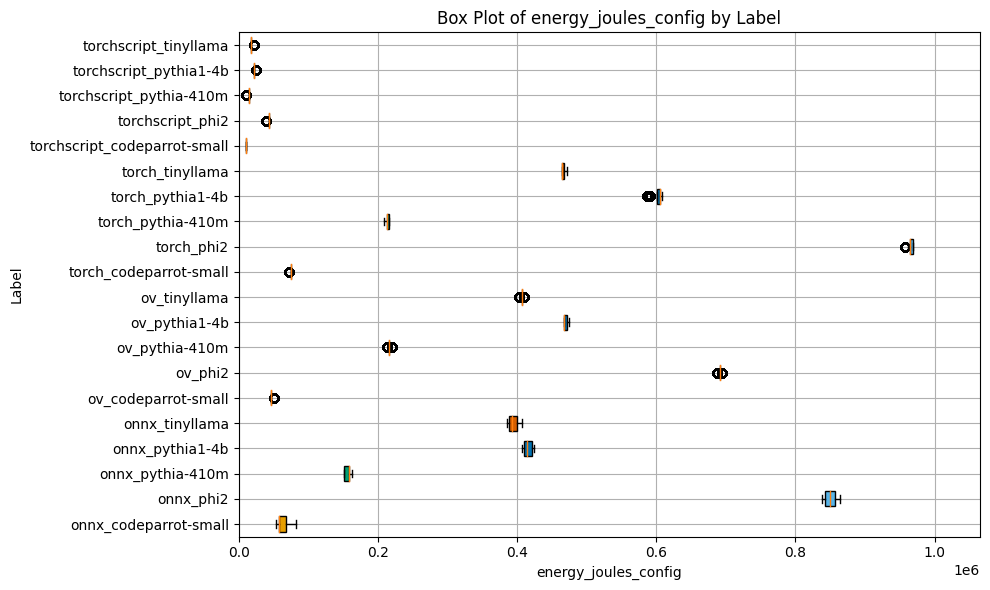

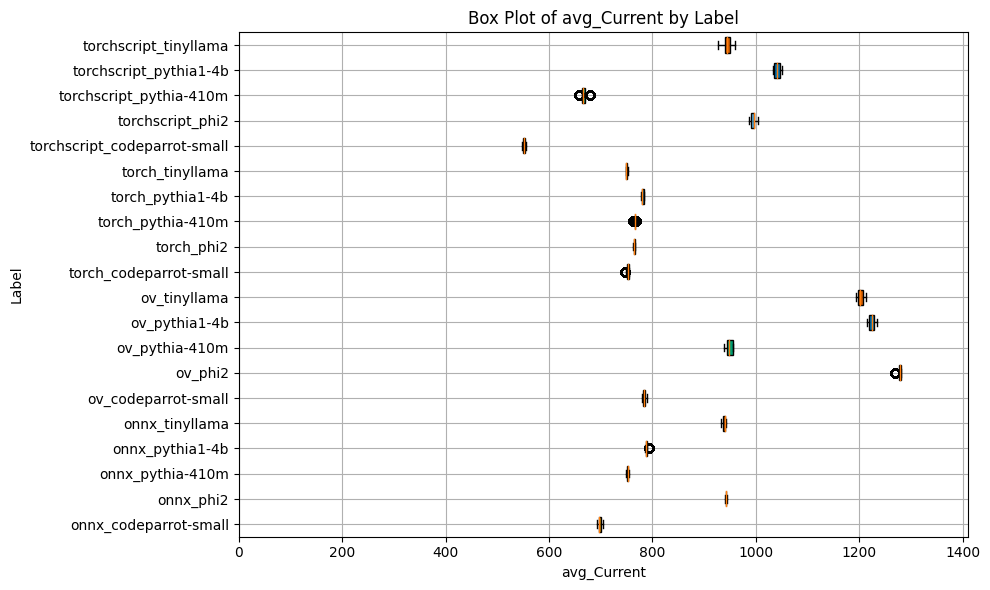

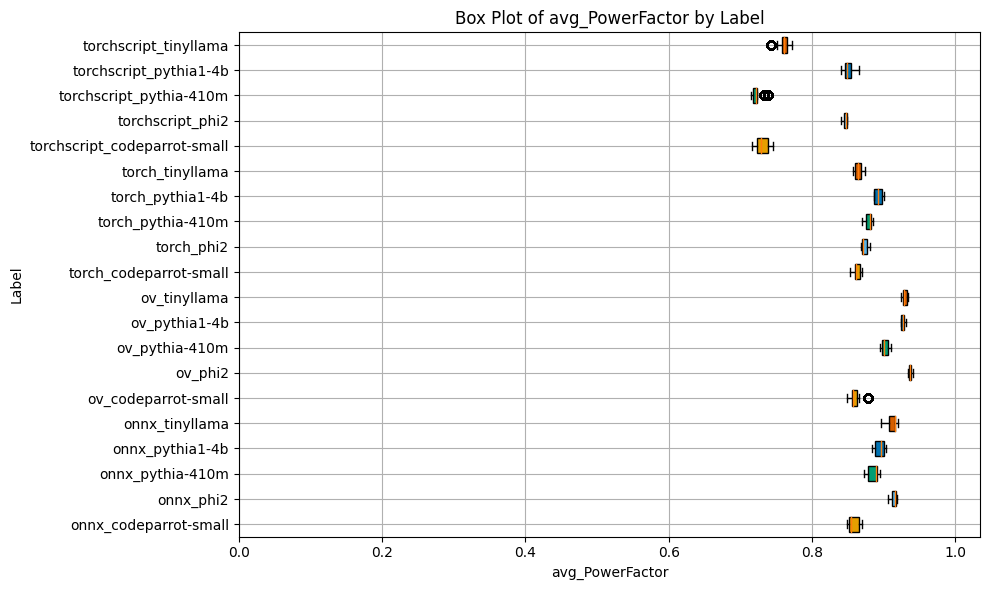

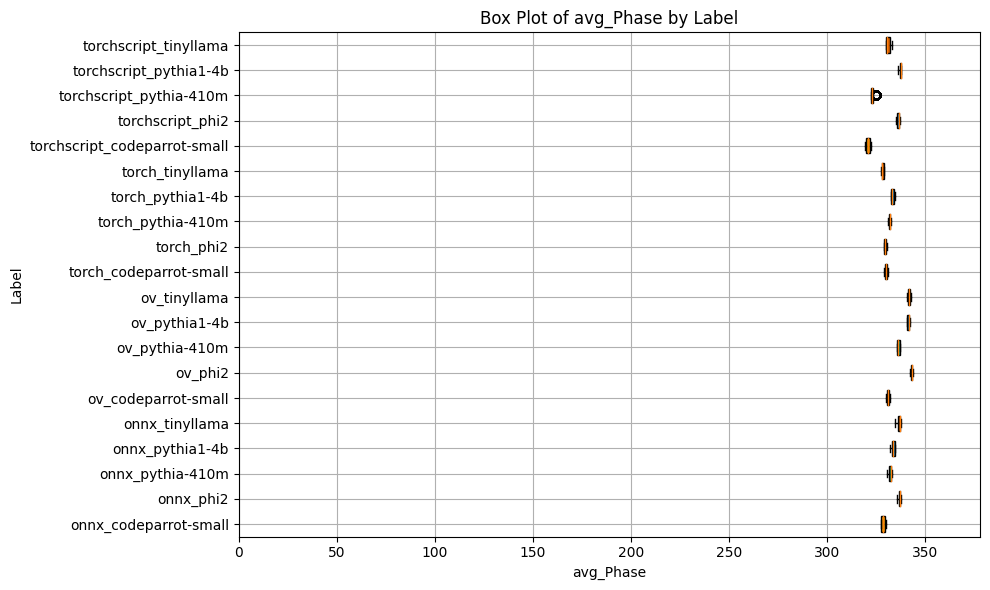

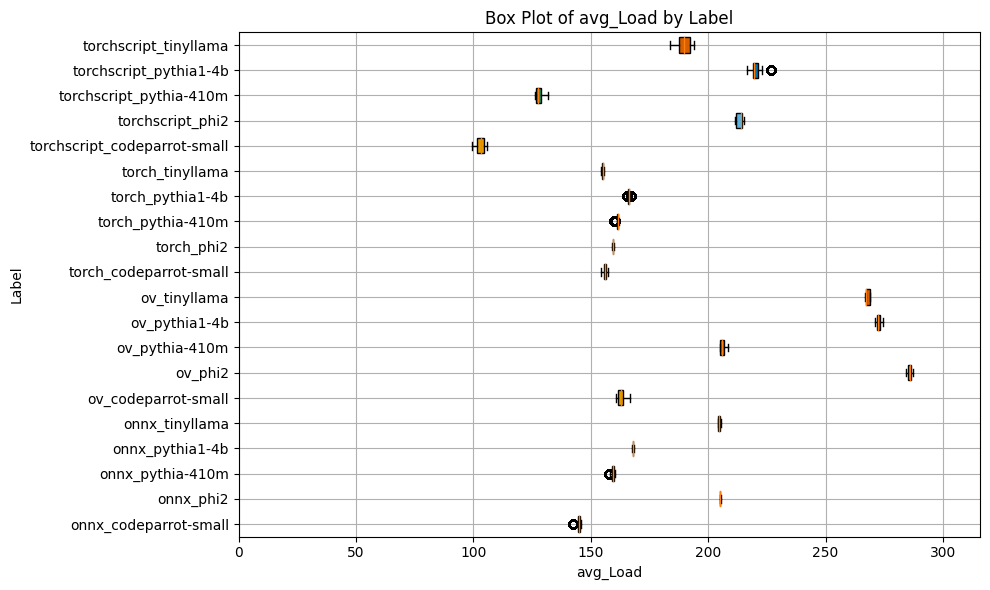

In [36]:
# Define some colors for the boxes
colors = ['blue', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'orange', 'yellow', 'cyan']
colors=["#E69F00", "#56B4E9", "#009E73", "#0072B2", "#D55E00", "#CC79A7", "#F0E442"]
colors = colors[:num_models]

# Make the color list cyclic in case there are more groups than colors
color_cycle = itertools.cycle(colors)

#variables_to_plot = ['Energy (Wattmeter) [J]','Current [mA]','Power Factor [-]','Phase [°]' ,'Load [W]']
variables_to_plot = ['energy_joules_config','avg_Current','avg_PowerFactor','avg_Phase' ,'avg_Load']



# Generate box plots
for variable in variables_to_plot:
    plt.figure(figsize=(10, 6))
    
    # Group data by 'label'
    grouped = wattmeter_plot.groupby('label')
    
    # We need to know the number of groups
    num_groups = len(grouped)
    
    # Creating a box for each group
    for i, (name, group) in enumerate(grouped):
        # Plot only the part of the data for this group
        # `positions` gives the position of the box in the plot
        plt.boxplot(group[variable].dropna(), positions=[i], widths=0.6, vert=False, patch_artist=True,
                    boxprops=dict(facecolor=next(color_cycle)))  # Use cyclic color

    # Customizing plot
    plt.title(f'Box Plot of {variable} by Label')
    plt.xlabel(variable)
    plt.yticks(np.arange(num_groups), grouped.groups.keys())  # Set y-ticks to group names
    plt.ylabel('Label')
    plt.xlim([0,wattmeter_plot[variable].max()*1.1])
    plt.grid(True)
    
    plt.tight_layout()  # Adjust layout to make room for labels
    #plt.savefig(save_dir + "wattmeter_"+variable)

plt.show()


## RQ CPU energy + GPU energy

In [37]:
print(energi_df['energy'].max())
print(nvidia_df['energy'].max())
print(wattmeter_df['energy_joules_config'].max())


496114.3751220703
116989.32813736067
968400


### box plots

In [38]:
energi_df.columns

Index(['time', 'runtime', 'model', 'CPU_ENERGY (J)', 'TOTAL_MEMORY',
       'TOTAL_SWAP', 'USED_MEMORY', 'USED_SWAP', 'AVG_CPU_USAGE_SAMP', 'label',
       'avg_TOTAL_MEMORY', 'avg_TOTAL_SWAP', 'avg_USED_MEMORY',
       'avg_USED_SWAP', 'avg_cpu_usage_config', 'energy',
       'avg_used_memory_pct_config', 'experiment'],
      dtype='object')

In [39]:
energy_energi = energi_df[['runtime','model','label','energy','experiment']]
energy_energi

,runtime,model,label,energy,experiment
0,idle,idle,idle_idle,5513.152359,1
1,idle,idle,idle_idle,5513.152359,1
2,idle,idle,idle_idle,5513.152359,1
3,idle,idle,idle_idle,5513.152359,1
4,idle,idle,idle_idle,5513.152359,1
...,...,...,...,...,...
1635232,ov,phi2,ov_phi2,443176.791641,9
1635233,ov,phi2,ov_phi2,443176.791641,9
1635234,ov,phi2,ov_phi2,443176.791641,9
1635235,ov,phi2,ov_phi2,443176.791641,9


In [40]:
nvidia_df.columns

Index(['time', 'runtime', 'model', ' utilization.gpu [%]',
       ' utilization.memory [%]', ' memory.total [MiB]', ' memory.used [MiB]',
       ' power.draw [W]', ' power.max_limit [W]', ' temperature.gpu', 'label',
       'used_memory_pct_mib', 'avg_utilization_gpu_config',
       'avg_utilization_memory_config', 'avg_memory_used_config',
       'avg_power_draw_config', 'avg_temperature_gpu_config',
       'avg_used_memory_pct_mib', 'config_duration', 'energy', 'experiment'],
      dtype='object')

In [41]:
energy_nvidia = nvidia_df[['runtime','model','label','energy','experiment']]
energy_nvidia

,runtime,model,label,energy,experiment
0,torch,pythia1-4b,torch_pythia1-4b,66524.312200,1
1,torch,pythia1-4b,torch_pythia1-4b,66524.312200,1
2,torch,pythia1-4b,torch_pythia1-4b,66524.312200,1
3,torch,pythia1-4b,torch_pythia1-4b,66524.312200,1
4,torch,pythia1-4b,torch_pythia1-4b,66524.312200,1
...,...,...,...,...,...
3221086,ov,phi2,ov_phi2,45715.361205,9
3221087,ov,phi2,ov_phi2,45715.361205,9
3221088,ov,phi2,ov_phi2,45715.361205,9
3221089,ov,phi2,ov_phi2,45715.361205,9


In [42]:
cpu_aggregated = energy_energi.groupby(['label', 'experiment'])['energy'].mean().reset_index()
cpu_aggregated

,label,experiment,energy
0,idle_idle,1,5513.152359
1,idle_idle,2,5561.186554
2,idle_idle,3,5483.603592
3,idle_idle,4,5449.920105
4,idle_idle,5,5253.230927
...,...,...,...
205,torchscript_tinyllama,6,11292.901901
206,torchscript_tinyllama,7,11275.560516
207,torchscript_tinyllama,8,11315.556534
208,torchscript_tinyllama,9,11278.999252


In [43]:
gpu_aggregated = energy_nvidia.groupby(['label', 'experiment'])['energy'].mean().reset_index()
gpu_aggregated

,label,experiment,energy
0,onnx_codeparrot-small,1,7697.584404
1,onnx_codeparrot-small,2,12712.752411
2,onnx_codeparrot-small,3,9962.477919
3,onnx_codeparrot-small,4,7835.923271
4,onnx_codeparrot-small,5,12847.023003
...,...,...,...
195,torchscript_tinyllama,6,1929.084494
196,torchscript_tinyllama,7,1923.520505
197,torchscript_tinyllama,8,1892.603001
198,torchscript_tinyllama,9,1923.929447


In [44]:
# Merge the aggregated dataframes
merged_df = pd.merge(cpu_aggregated, gpu_aggregated, on=['label', 'experiment'], how='outer')
merged_df

,label,experiment,energy_x,energy_y
0,idle_idle,1,5513.152359,NaN
1,idle_idle,2,5561.186554,NaN
2,idle_idle,3,5483.603592,NaN
3,idle_idle,4,5449.920105,NaN
4,idle_idle,5,5253.230927,NaN
...,...,...,...,...
205,torchscript_tinyllama,6,11292.901901,1929.084494
206,torchscript_tinyllama,7,11275.560516,1923.520505
207,torchscript_tinyllama,8,11315.556534,1892.603001
208,torchscript_tinyllama,9,11278.999252,1923.929447


In [45]:
merged_df.fillna(0, inplace=True)
merged_df

,label,experiment,energy_x,energy_y
0,idle_idle,1,5513.152359,0.000000
1,idle_idle,2,5561.186554,0.000000
2,idle_idle,3,5483.603592,0.000000
3,idle_idle,4,5449.920105,0.000000
4,idle_idle,5,5253.230927,0.000000
...,...,...,...,...
205,torchscript_tinyllama,6,11292.901901,1929.084494
206,torchscript_tinyllama,7,11275.560516,1923.520505
207,torchscript_tinyllama,8,11315.556534,1892.603001
208,torchscript_tinyllama,9,11278.999252,1923.929447


In [46]:
#merged_df.loc[merged_df['label'] == 'idle_idle'] 

In [47]:

#merged_df.loc[merged_df['label'] == 'onnx_tinyllama'] 

In [48]:
path

'D:/GAISSA/energy-repo/last_repo/june_cpu/'

In [49]:
# merged_df.rename(columns={'energy_x': 'CPU energy (config) [J]'}, inplace=True)
# merged_df.rename(columns={'energy_y': 'GPU energy (config) [J]'}, inplace=True)
# merged_df['Total energy [J]'] = merged_df['CPU energy (config) [J]'] + merged_df['GPU energy (config) [J]'] 
merged_df.rename(columns={'energy_x': 'CPU_energy'}, inplace=True)
merged_df.rename(columns={'energy_y': 'GPU_energy'}, inplace=True)
merged_df['global_energy'] = merged_df['CPU_energy'] + merged_df['GPU_energy'] 
merged_df

,label,experiment,CPU_energy,GPU_energy,global_energy
0,idle_idle,1,5513.152359,0.000000,5513.152359
1,idle_idle,2,5561.186554,0.000000,5561.186554
2,idle_idle,3,5483.603592,0.000000,5483.603592
3,idle_idle,4,5449.920105,0.000000,5449.920105
4,idle_idle,5,5253.230927,0.000000,5253.230927
...,...,...,...,...,...
205,torchscript_tinyllama,6,11292.901901,1929.084494,13221.986395
206,torchscript_tinyllama,7,11275.560516,1923.520505,13199.081021
207,torchscript_tinyllama,8,11315.556534,1892.603001,13208.159535
208,torchscript_tinyllama,9,11278.999252,1923.929447,13202.928699


In [50]:
#condition = merged_df['label'].str.endswith('phi2')

#merged_df_plot = remove_condition_rows( condition, merged_df)
merged_df_plot = merged_df

merged_df_plot

,label,experiment,CPU_energy,GPU_energy,global_energy
0,idle_idle,1,5513.152359,0.000000,5513.152359
1,idle_idle,2,5561.186554,0.000000,5561.186554
2,idle_idle,3,5483.603592,0.000000,5483.603592
3,idle_idle,4,5449.920105,0.000000,5449.920105
4,idle_idle,5,5253.230927,0.000000,5253.230927
...,...,...,...,...,...
205,torchscript_tinyllama,6,11292.901901,1929.084494,13221.986395
206,torchscript_tinyllama,7,11275.560516,1923.520505,13199.081021
207,torchscript_tinyllama,8,11315.556534,1892.603001,13208.159535
208,torchscript_tinyllama,9,11278.999252,1923.929447,13202.928699


In [51]:
print(tables_dir)
merged_df_plot.to_csv(tables_dir+'final_energy_data.csv', index=False) if SAVE_TABLES else print(f"SAVE_TABLES:{SAVE_TABLES}")


D:/GAISSA/energy-repo/last_repo/june_cpu/tables/


In [52]:
merged_df_plot

,label,experiment,CPU_energy,GPU_energy,global_energy
0,idle_idle,1,5513.152359,0.000000,5513.152359
1,idle_idle,2,5561.186554,0.000000,5561.186554
2,idle_idle,3,5483.603592,0.000000,5483.603592
3,idle_idle,4,5449.920105,0.000000,5449.920105
4,idle_idle,5,5253.230927,0.000000,5253.230927
...,...,...,...,...,...
205,torchscript_tinyllama,6,11292.901901,1929.084494,13221.986395
206,torchscript_tinyllama,7,11275.560516,1923.520505,13199.081021
207,torchscript_tinyllama,8,11315.556534,1892.603001,13208.159535
208,torchscript_tinyllama,9,11278.999252,1923.929447,13202.928699


In [53]:
# condition = merged_df_plot['label'] == 'idle_idle'
# merged_df_plot = merged_df_plot[~condition]
# merged_df_plot

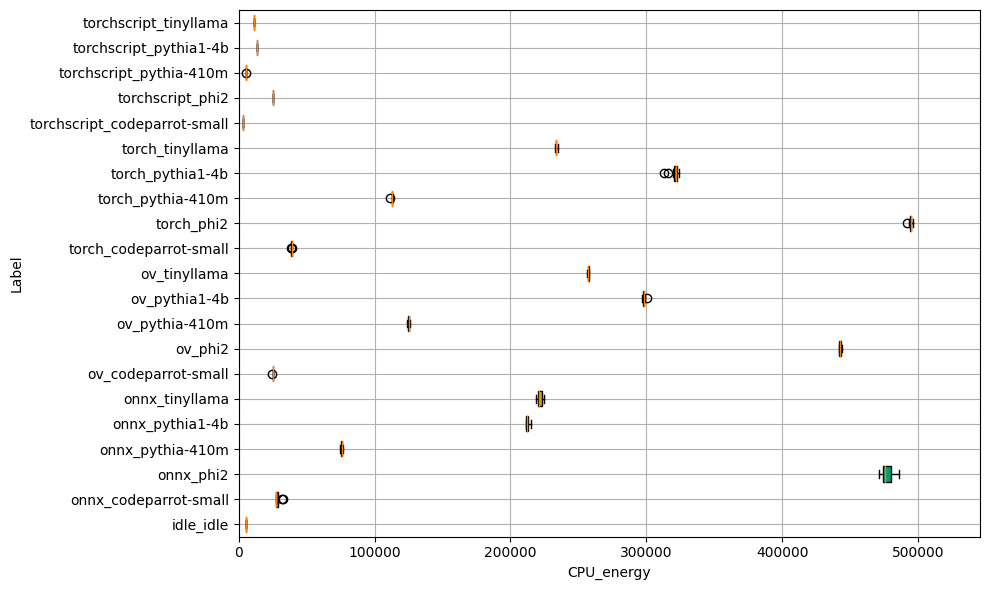

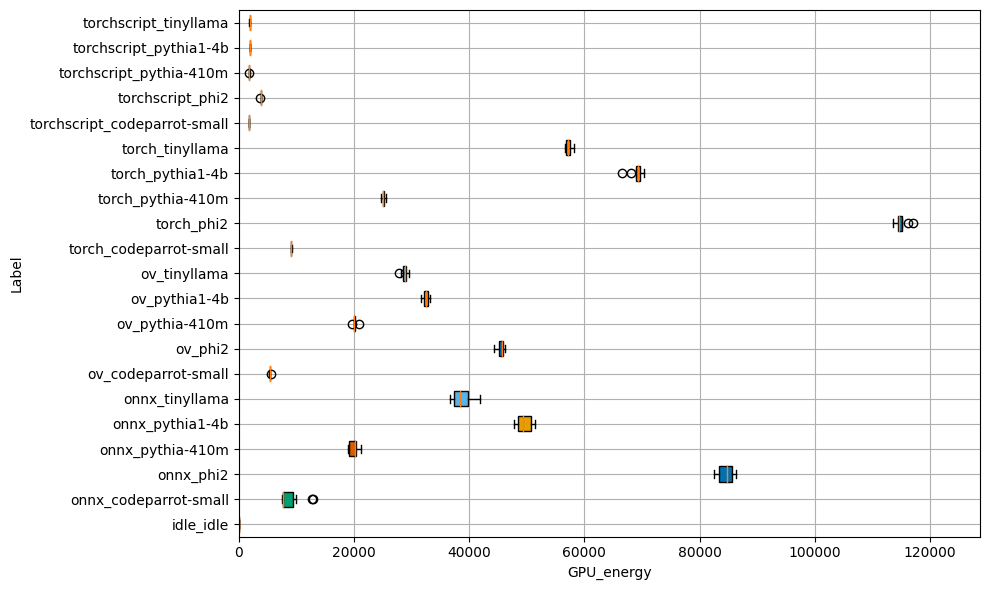

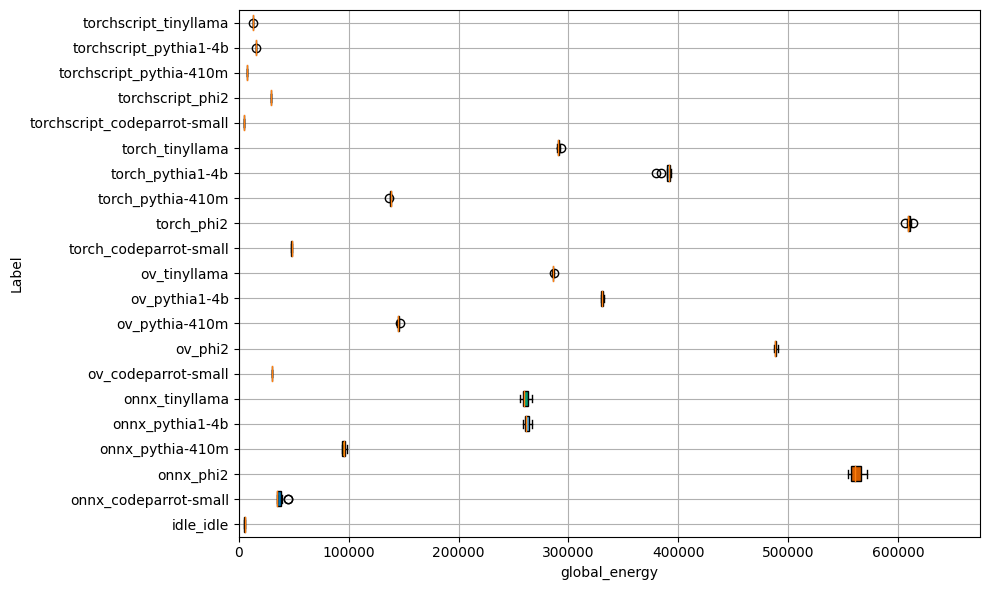

In [54]:

variables_to_plot = ['CPU_energy','GPU_energy','global_energy']
# Define some colors for the boxes
colors = ['blue', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'orange', 'yellow', 'cyan']
colors=["#E69F00", "#56B4E9", "#009E73", "#0072B2", "#D55E00", "#CC79A7", "#F0E442"]
colors = colors[:num_models]

# Make the color list cyclic in case there are more groups than colors
color_cycle = itertools.cycle(colors)

n=0
# Generate box plots
for variable in variables_to_plot:
    plt.figure(figsize=(10, 6))
    
    # Group data by 'label'
    grouped = merged_df_plot.groupby('label')
    
    # We need to know the number of groups
    num_groups = len(grouped)
    
    # Creating a box for each group
    for i, (name, group) in enumerate(grouped):
        # Plot only the part of the data for this group
        # `positions` gives the position of the box in the plot
        
        plt.boxplot(group[variable].dropna(), positions=[i], widths=0.6, vert=False, patch_artist=True,
                boxprops=dict(facecolor=next(color_cycle)))  # Use cyclic color
        
        #median = np.median(group[variable].dropna())
        #print(name +" -> "+ str(median))

    # Customizing plot
    #plt.title(f'Box Plot of {variable} by Label')
    plt.xlabel(variable)
    plt.yticks(np.arange(num_groups), grouped.groups.keys())  # Set y-ticks to group names
    plt.ylabel('Label')
    plt.xlim([0,merged_df_plot[variable].max()*1.1])
    plt.grid(True)
    
    plt.tight_layout()  # Adjust layout to make room for labels
    
    plt.savefig(save_dir + "energy_"+variable) if SAVE_FIGS else print(f"SAVE_FIGS:{SAVE_FIGS}")
    n+=1
plt.show()


### Median values of energy

In [55]:
# Calculate mean values for each label
df = merged_df_plot
median_energy_values = df.groupby('label').median()

# Optionally, you might want to reset the index if you need 'label' as a column
median_energy_values.reset_index(inplace=True)

#median_energy_values = median_energy_values.drop(columns = ['experiment'])
median_energy_values

,label,experiment,CPU_energy,GPU_energy,global_energy
0,idle_idle,5.5,5450.420303,0.000000,5450.420303
1,onnx_codeparrot-small,5.5,27370.594078,7695.837711,35024.957307
2,onnx_phi2,5.5,475452.949699,84742.714270,560611.319751
3,onnx_pythia-410m,5.5,75764.569603,20115.917003,95902.225445
4,onnx_pythia1-4b,5.5,212320.958244,49335.967747,261702.503859
5,onnx_tinyllama,5.5,221268.890221,38324.805405,259593.695626
6,ov_codeparrot-small,5.5,24936.388664,5455.467005,30393.930993
7,ov_phi2,5.5,442486.860435,45647.618833,488261.501346
8,ov_pythia-410m,5.5,125089.230072,20033.277757,145139.004625
9,ov_pythia1-4b,5.5,298005.695007,32518.830688,330258.365849


In [56]:
# Split the 'label' column into 'runtime' and 'model'
median_energy_values[['runtime', 'model']] = median_energy_values['label'].str.split('_', n=1, expand=True)
median_energy_values

,label,experiment,CPU_energy,GPU_energy,global_energy,runtime,model
0,idle_idle,5.5,5450.420303,0.000000,5450.420303,idle,idle
1,onnx_codeparrot-small,5.5,27370.594078,7695.837711,35024.957307,onnx,codeparrot-small
2,onnx_phi2,5.5,475452.949699,84742.714270,560611.319751,onnx,phi2
3,onnx_pythia-410m,5.5,75764.569603,20115.917003,95902.225445,onnx,pythia-410m
4,onnx_pythia1-4b,5.5,212320.958244,49335.967747,261702.503859,onnx,pythia1-4b
5,onnx_tinyllama,5.5,221268.890221,38324.805405,259593.695626,onnx,tinyllama
6,ov_codeparrot-small,5.5,24936.388664,5455.467005,30393.930993,ov,codeparrot-small
7,ov_phi2,5.5,442486.860435,45647.618833,488261.501346,ov,phi2
8,ov_pythia-410m,5.5,125089.230072,20033.277757,145139.004625,ov,pythia-410m
9,ov_pythia1-4b,5.5,298005.695007,32518.830688,330258.365849,ov,pythia1-4b


In [57]:
# Define the new order of the columns
#new_order = ['label', 'Used memory (Energibridge) [B]','CPU usage (Energibridge) [%]', 'runtime', 'model']
new_order= list(median_energy_values.columns[-2:]) + list(median_energy_values.columns[:-2])
# Reorder the columns by indexing in the new order
median_energy_values = median_energy_values[new_order]
median_energy_values

,runtime,model,label,experiment,CPU_energy,GPU_energy,global_energy
0,idle,idle,idle_idle,5.5,5450.420303,0.000000,5450.420303
1,onnx,codeparrot-small,onnx_codeparrot-small,5.5,27370.594078,7695.837711,35024.957307
2,onnx,phi2,onnx_phi2,5.5,475452.949699,84742.714270,560611.319751
3,onnx,pythia-410m,onnx_pythia-410m,5.5,75764.569603,20115.917003,95902.225445
4,onnx,pythia1-4b,onnx_pythia1-4b,5.5,212320.958244,49335.967747,261702.503859
5,onnx,tinyllama,onnx_tinyllama,5.5,221268.890221,38324.805405,259593.695626
6,ov,codeparrot-small,ov_codeparrot-small,5.5,24936.388664,5455.467005,30393.930993
7,ov,phi2,ov_phi2,5.5,442486.860435,45647.618833,488261.501346
8,ov,pythia-410m,ov_pythia-410m,5.5,125089.230072,20033.277757,145139.004625
9,ov,pythia1-4b,ov_pythia1-4b,5.5,298005.695007,32518.830688,330258.365849


In [58]:
median_energy_values.to_csv(tables_dir+'median_energy_values.csv', index=False)  if SAVE_TABLES else print(f"SAVE_TABLES:{SAVE_TABLES}")


In [59]:
median_energy_values = median_energy_values.drop(columns = ['label','experiment'])


In [60]:
median_energy_values

,runtime,model,CPU_energy,GPU_energy,global_energy
0,idle,idle,5450.420303,0.000000,5450.420303
1,onnx,codeparrot-small,27370.594078,7695.837711,35024.957307
2,onnx,phi2,475452.949699,84742.714270,560611.319751
3,onnx,pythia-410m,75764.569603,20115.917003,95902.225445
4,onnx,pythia1-4b,212320.958244,49335.967747,261702.503859
5,onnx,tinyllama,221268.890221,38324.805405,259593.695626
6,ov,codeparrot-small,24936.388664,5455.467005,30393.930993
7,ov,phi2,442486.860435,45647.618833,488261.501346
8,ov,pythia-410m,125089.230072,20033.277757,145139.004625
9,ov,pythia1-4b,298005.695007,32518.830688,330258.365849


In [61]:
filename = tables_dir + 'median_energy_values.tex'
save_latex_table(median_energy_values,filename)

\begin{tabular}{llrrr}
\toprule
runtime & model & CPU energy & GPU energy & global energy \\
\midrule
idle & idle & 5450.420303 & 0.000000 & 5450.420303 \\
onnx & codeparrot-small & 27370.594078 & 7695.837711 & 35024.957307 \\
onnx & phi2 & 475452.949699 & 84742.714270 & 560611.319751 \\
onnx & pythia-410m & 75764.569603 & 20115.917003 & 95902.225445 \\
onnx & pythia1-4b & 212320.958244 & 49335.967747 & 261702.503859 \\
onnx & tinyllama & 221268.890221 & 38324.805405 & 259593.695626 \\
ov & codeparrot-small & 24936.388664 & 5455.467005 & 30393.930993 \\
ov & phi2 & 442486.860435 & 45647.618833 & 488261.501346 \\
ov & pythia-410m & 125089.230072 & 20033.277757 & 145139.004625 \\
ov & pythia1-4b & 298005.695007 & 32518.830688 & 330258.365849 \\
ov & tinyllama & 257276.523949 & 28813.319413 & 286127.575814 \\
torch & codeparrot-small & 38922.891640 & 9092.602461 & 48006.204243 \\
torch & phi2 & 494766.105080 & 114590.373437 & 609310.464135 \\
torch & pythia-410m & 112852.760742 & 25091.18

In [62]:
# # Convert DataFrame to LaTeX table
# latex_table = median_energy_values.to_latex(index=False)

# # Define the filename
#filename = tables_dir + 'median_energy_values.tex'

# # Open the file in write mode
# with open(filename, 'w') as file:
#     file.write(latex_table)
    
# # Print LaTeX table
# print(latex_table)

### Mean values of energy

In [63]:
# Calculate mean values for each label
df = merged_df_plot
mean_values = df.groupby('label').mean()

# Optionally, you might want to reset the index if you need 'label' as a column
mean_values.reset_index(inplace=True)

mean_values = mean_values.drop(columns = ['experiment'])
mean_values

,label,CPU_energy,GPU_energy,global_energy
0,idle_idle,5372.618376,0.000000,5372.618376
1,onnx_codeparrot-small,28421.296902,8913.686970,37334.983872
2,onnx_phi2,477257.500885,84569.602344,561827.103229
3,onnx_pythia-410m,75678.377306,19888.409550,95566.786855
4,onnx_pythia1-4b,212442.140479,49551.952713,261994.093192
5,onnx_tinyllama,221681.730835,38885.363977,260567.094812
6,ov_codeparrot-small,24927.568626,5448.855568,30376.424194
7,ov_phi2,442850.714137,45511.908917,488362.623055
8,ov_pythia-410m,125012.195085,20112.370219,145124.565304
9,ov_pythia1-4b,298114.634114,32515.087758,330629.721872


In [64]:
pwd

'D:\\GAISSA\\energy-repo\\last_repo\\energy-ml-serving\\experiments'

In [65]:
# Split the 'label' column into 'runtime' and 'model'
mean_values[['runtime', 'model']] = mean_values['label'].str.split('_', n=1, expand=True)
#df[['runtime', 'model']] = df['label'].str.split('_', n=1, expand=True)
mean_values

,label,CPU_energy,GPU_energy,global_energy,runtime,model
0,idle_idle,5372.618376,0.000000,5372.618376,idle,idle
1,onnx_codeparrot-small,28421.296902,8913.686970,37334.983872,onnx,codeparrot-small
2,onnx_phi2,477257.500885,84569.602344,561827.103229,onnx,phi2
3,onnx_pythia-410m,75678.377306,19888.409550,95566.786855,onnx,pythia-410m
4,onnx_pythia1-4b,212442.140479,49551.952713,261994.093192,onnx,pythia1-4b
5,onnx_tinyllama,221681.730835,38885.363977,260567.094812,onnx,tinyllama
6,ov_codeparrot-small,24927.568626,5448.855568,30376.424194,ov,codeparrot-small
7,ov_phi2,442850.714137,45511.908917,488362.623055,ov,phi2
8,ov_pythia-410m,125012.195085,20112.370219,145124.565304,ov,pythia-410m
9,ov_pythia1-4b,298114.634114,32515.087758,330629.721872,ov,pythia1-4b


In [66]:
mean_values.to_csv(tables_dir+'mean_values_by_label.csv', index=False) if SAVE_TABLES else print(f"SAVE_TABLES:{SAVE_TABLES}")


In [67]:
mean_values = mean_values.drop(columns = ['label'])
mean_values

,CPU_energy,GPU_energy,global_energy,runtime,model
0,5372.618376,0.000000,5372.618376,idle,idle
1,28421.296902,8913.686970,37334.983872,onnx,codeparrot-small
2,477257.500885,84569.602344,561827.103229,onnx,phi2
3,75678.377306,19888.409550,95566.786855,onnx,pythia-410m
4,212442.140479,49551.952713,261994.093192,onnx,pythia1-4b
5,221681.730835,38885.363977,260567.094812,onnx,tinyllama
6,24927.568626,5448.855568,30376.424194,ov,codeparrot-small
7,442850.714137,45511.908917,488362.623055,ov,phi2
8,125012.195085,20112.370219,145124.565304,ov,pythia-410m
9,298114.634114,32515.087758,330629.721872,ov,pythia1-4b


In [68]:
filename = tables_dir + 'mean_energy_values.tex'
save_latex_table(mean_values,filename)

\begin{tabular}{rrrll}
\toprule
CPU energy & GPU energy & global energy & runtime & model \\
\midrule
5372.618376 & 0.000000 & 5372.618376 & idle & idle \\
28421.296902 & 8913.686970 & 37334.983872 & onnx & codeparrot-small \\
477257.500885 & 84569.602344 & 561827.103229 & onnx & phi2 \\
75678.377306 & 19888.409550 & 95566.786855 & onnx & pythia-410m \\
212442.140479 & 49551.952713 & 261994.093192 & onnx & pythia1-4b \\
221681.730835 & 38885.363977 & 260567.094812 & onnx & tinyllama \\
24927.568626 & 5448.855568 & 30376.424194 & ov & codeparrot-small \\
442850.714137 & 45511.908917 & 488362.623055 & ov & phi2 \\
125012.195085 & 20112.370219 & 145124.565304 & ov & pythia-410m \\
298114.634114 & 32515.087758 & 330629.721872 & ov & pythia1-4b \\
257326.069200 & 28732.455991 & 286058.525191 & ov & tinyllama \\
38924.630074 & 9090.853239 & 48015.483312 & torch & codeparrot-small \\
494568.147421 & 114911.061160 & 609479.208581 & torch & phi2 \\
112838.778185 & 25089.763713 & 137928.541898 &

In [69]:

# # Convert DataFrame to LaTeX table
# latex_table = mean_values.to_latex(index=False)

# # Define the filename
# filename = tables_dir + 'mean_energy_values.tex'

# # Open the file in write mode
# with open(filename, 'w') as file:
#     file.write(latex_table)
    
# # Print LaTeX table
# print(latex_table)

# RQ1.2

## Resource utilization: Energibridge: CPU usage, Used memory

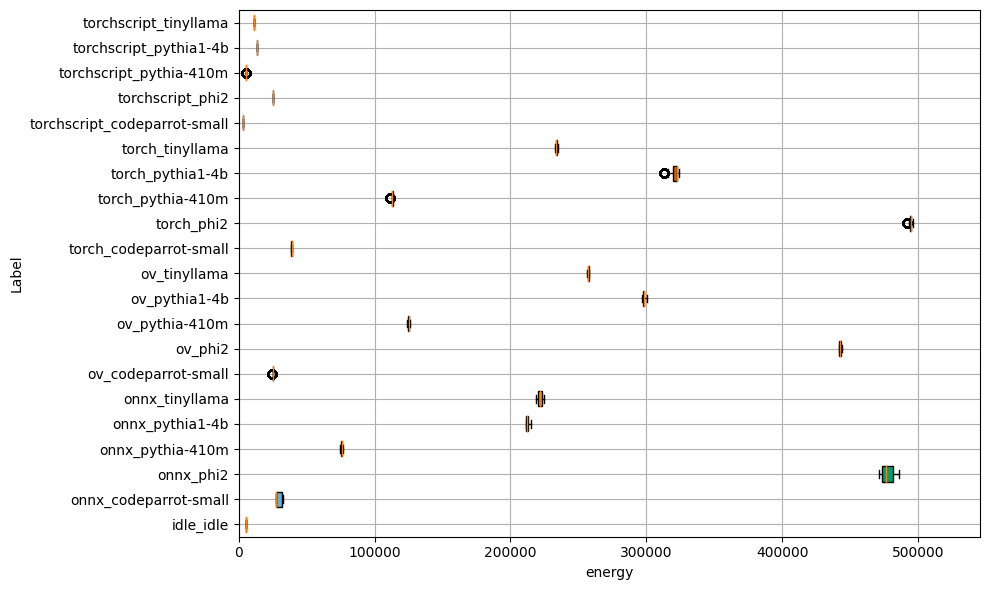

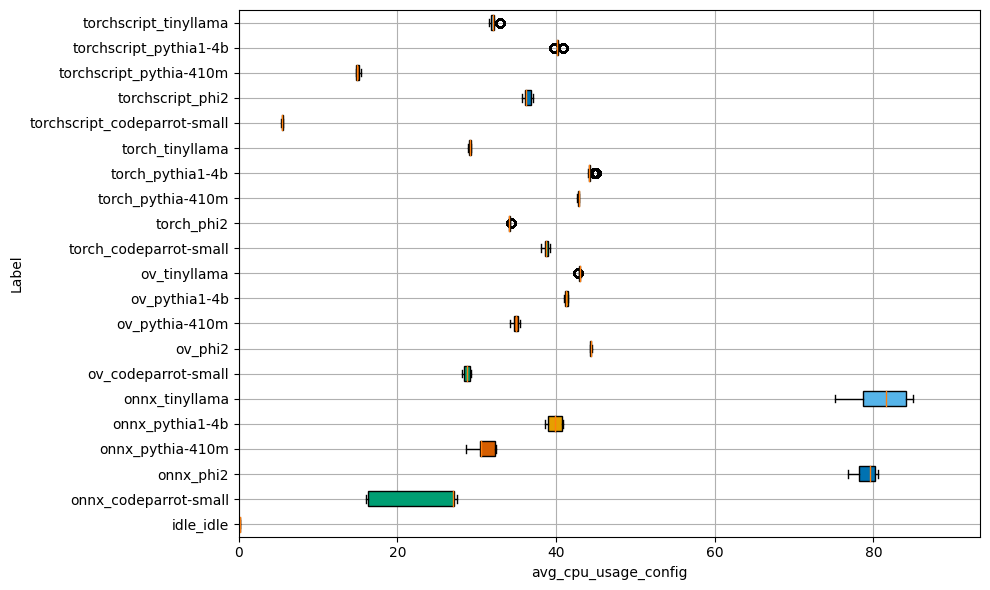

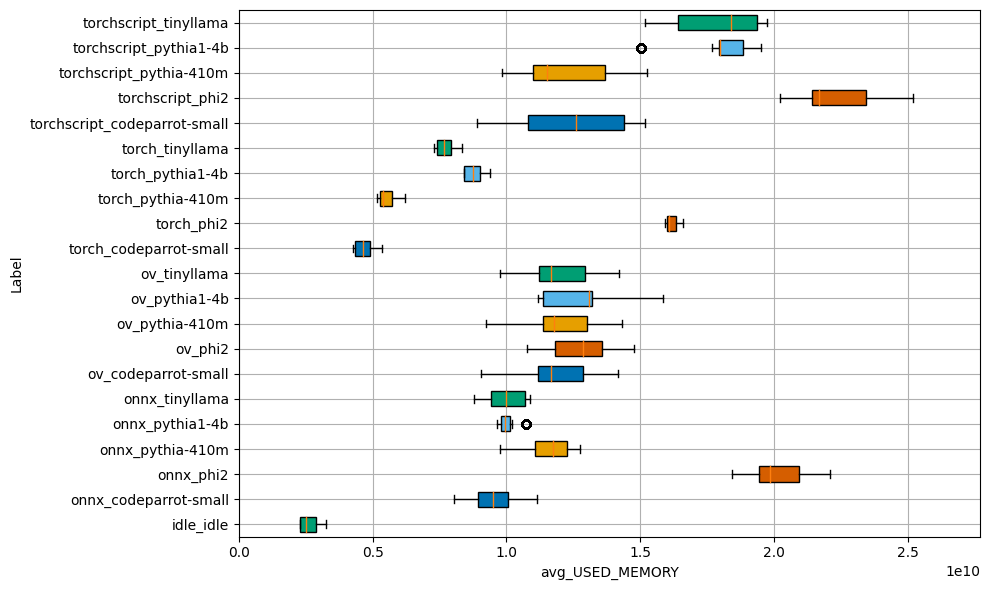

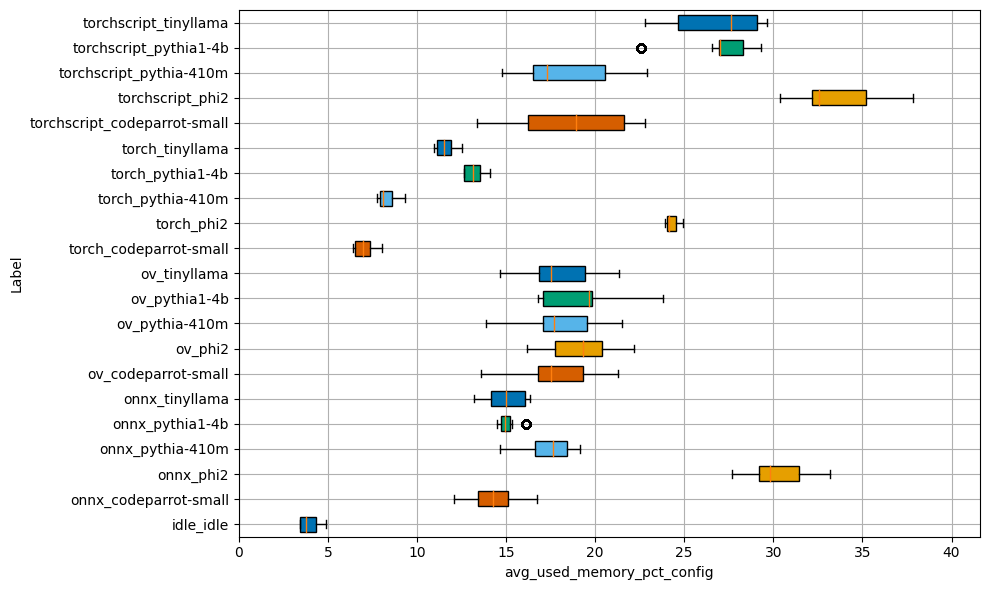

In [70]:

#variables_to_plot = [ 'Energy (Energibridge) [J]', "CPU usage (Energibridge) [%]",  'Used memory (Energibridge) [B]',]

variables_to_plot = [ 'energy', "avg_cpu_usage_config",  'avg_USED_MEMORY','avg_used_memory_pct_config']

# Define some colors for the boxes
colors = ['blue', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'orange', 'yellow', 'cyan']
colors=["#E69F00", "#56B4E9", "#009E73", "#0072B2", "#D55E00", "#CC79A7", "#F0E442"]
colors = colors[:num_models]
# Make the color list cyclic in case there are more groups than colors
color_cycle = itertools.cycle(colors)

# Generate box plots
for variable in variables_to_plot:
    plt.figure(figsize=(10, 6))
    
    # Group data by 'label' : runtime_model
    grouped = energi_plot.groupby('label')
    
    # We need to know the number of groups
    num_groups = len(grouped)
    
    # Creating a box for each group
    for i, (name, group) in enumerate(grouped):
        # Plot only the part of the data for this group
        # `positions` gives the position of the box in the plot
        plt.boxplot(group[variable].dropna(), positions=[i], widths=0.6, vert=False, patch_artist=True,
                    boxprops=dict(facecolor=next(color_cycle)))  # Use cyclic color

    # Customizing plot
    #plt.title(f'Box Plot of {variable} by Label')
    plt.xlabel(variable)
    plt.xlim([0,energi_plot[variable].max()*1.1])
    
    plt.yticks(np.arange(num_groups), grouped.groups.keys())  # Set y-ticks to group names
    plt.ylabel('Label')
    plt.grid(True)
    plt.tight_layout()  # Adjust layout to make room for labels
    plt.savefig(save_dir+"energi_"+variable) if SAVE_FIGS else print(f"SAVE_FIGS:{SAVE_FIGS}")

plt.show()


In [71]:
energi_plot.head()

,time,runtime,model,CPU_ENERGY (J),TOTAL_MEMORY,TOTAL_SWAP,USED_MEMORY,USED_SWAP,AVG_CPU_USAGE_SAMP,label,avg_TOTAL_MEMORY,avg_TOTAL_SWAP,avg_USED_MEMORY,avg_USED_SWAP,avg_cpu_usage_config,energy,avg_used_memory_pct_config,experiment
0,2024-06-12 02:19:20.818,idle,idle,849107.627319,66575949824,2147479552,2730065920,0,6.485433,idle_idle,6.657595e+10,2.147480e+09,3.243619e+09,0.0,0.147192,5513.152359,4.872058,1
1,2024-06-12 02:19:20.818,idle,idle,849107.704010,66575949824,2147479552,2730582016,0,6.485433,idle_idle,6.657595e+10,2.147480e+09,3.243619e+09,0.0,0.147192,5513.152359,4.872058,1
2,2024-06-12 02:19:21.019,idle,idle,849121.668564,66575949824,2147479552,2799267840,0,6.403137,idle_idle,6.657595e+10,2.147480e+09,3.243619e+09,0.0,0.147192,5513.152359,4.872058,1
3,2024-06-12 02:19:21.219,idle,idle,849133.591034,66575949824,2147479552,2849468416,0,6.403137,idle_idle,6.657595e+10,2.147480e+09,3.243619e+09,0.0,0.147192,5513.152359,4.872058,1
4,2024-06-12 02:19:21.419,idle,idle,849145.633667,66575949824,2147479552,2896470016,0,5.833782,idle_idle,6.657595e+10,2.147480e+09,3.243619e+09,0.0,0.147192,5513.152359,4.872058,1


In [72]:
#variables_to_plot = [ 'energy', "avg_cpu_usage_config",  'avg_USED_MEMORY','avg_used_memory_pct_config']

resource_energi = energi_plot[['label','experiment',"avg_cpu_usage_config",  'avg_USED_MEMORY','avg_used_memory_pct_config']]

resource_energi

,label,experiment,avg_cpu_usage_config,avg_USED_MEMORY,avg_used_memory_pct_config
0,idle_idle,1,0.147192,3.243619e+09,4.872058
1,idle_idle,1,0.147192,3.243619e+09,4.872058
2,idle_idle,1,0.147192,3.243619e+09,4.872058
3,idle_idle,1,0.147192,3.243619e+09,4.872058
4,idle_idle,1,0.147192,3.243619e+09,4.872058
...,...,...,...,...,...
1635232,ov_phi2,9,44.331846,1.216167e+10,18.267368
1635233,ov_phi2,9,44.331846,1.216167e+10,18.267368
1635234,ov_phi2,9,44.331846,1.216167e+10,18.267368
1635235,ov_phi2,9,44.331846,1.216167e+10,18.267368


In [73]:
SAVE_TABLES=True
resource_energi.to_csv(tables_dir+'final_energibridge_data.csv', index=False) if SAVE_TABLES else print(f"SAVE_TABLES:{SAVE_TABLES}")

### CPU usage and Used memory 

In [74]:
resource_energi = resource_energi.drop(columns = ['experiment'])

In [75]:
# Calculate mean values for each label
df = resource_energi
median_resource_energi = df.groupby('label').median()

# Optionally, you might want to reset the index if you need 'label' as a column
median_resource_energi.reset_index(inplace=True)

#median_energy_values = median_energy_values.drop(columns = ['experiment'])
median_resource_energi

,label,avg_cpu_usage_config,avg_USED_MEMORY,avg_used_memory_pct_config
0,idle_idle,0.130797,2.501843e+09,3.757879
1,onnx_codeparrot-small,27.016334,9.507387e+09,14.280513
2,onnx_phi2,79.619104,1.985527e+10,29.823487
3,onnx_pythia-410m,30.478362,1.173323e+10,17.623832
4,onnx_pythia1-4b,39.844363,9.955764e+09,14.953995
5,onnx_tinyllama,81.593727,1.000236e+10,15.023981
6,ov_codeparrot-small,28.739977,1.167752e+10,17.540144
7,ov_phi2,44.345280,1.285510e+10,19.308921
8,ov_pythia-410m,34.946671,1.179588e+10,17.717936
9,ov_pythia1-4b,41.236916,1.309087e+10,19.663062


In [76]:
# Split the 'label' column into 'runtime' and 'model'
median_resource_energi[['runtime', 'model']] = median_resource_energi['label'].str.split('_', n=1, expand=True)
median_resource_energi

,label,avg_cpu_usage_config,avg_USED_MEMORY,avg_used_memory_pct_config,runtime,model
0,idle_idle,0.130797,2.501843e+09,3.757879,idle,idle
1,onnx_codeparrot-small,27.016334,9.507387e+09,14.280513,onnx,codeparrot-small
2,onnx_phi2,79.619104,1.985527e+10,29.823487,onnx,phi2
3,onnx_pythia-410m,30.478362,1.173323e+10,17.623832,onnx,pythia-410m
4,onnx_pythia1-4b,39.844363,9.955764e+09,14.953995,onnx,pythia1-4b
5,onnx_tinyllama,81.593727,1.000236e+10,15.023981,onnx,tinyllama
6,ov_codeparrot-small,28.739977,1.167752e+10,17.540144,ov,codeparrot-small
7,ov_phi2,44.345280,1.285510e+10,19.308921,ov,phi2
8,ov_pythia-410m,34.946671,1.179588e+10,17.717936,ov,pythia-410m
9,ov_pythia1-4b,41.236916,1.309087e+10,19.663062,ov,pythia1-4b


In [77]:
# Define the new order of the columns
#new_order = ['label', 'Used memory (Energibridge) [B]','CPU usage (Energibridge) [%]', 'runtime', 'model']
new_order= list(median_resource_energi.columns[-2:]) + list(median_resource_energi.columns[:-2])
# Reorder the columns by indexing in the new order
median_resource_energi = median_resource_energi[new_order]
median_resource_energi

,runtime,model,label,avg_cpu_usage_config,avg_USED_MEMORY,avg_used_memory_pct_config
0,idle,idle,idle_idle,0.130797,2.501843e+09,3.757879
1,onnx,codeparrot-small,onnx_codeparrot-small,27.016334,9.507387e+09,14.280513
2,onnx,phi2,onnx_phi2,79.619104,1.985527e+10,29.823487
3,onnx,pythia-410m,onnx_pythia-410m,30.478362,1.173323e+10,17.623832
4,onnx,pythia1-4b,onnx_pythia1-4b,39.844363,9.955764e+09,14.953995
5,onnx,tinyllama,onnx_tinyllama,81.593727,1.000236e+10,15.023981
6,ov,codeparrot-small,ov_codeparrot-small,28.739977,1.167752e+10,17.540144
7,ov,phi2,ov_phi2,44.345280,1.285510e+10,19.308921
8,ov,pythia-410m,ov_pythia-410m,34.946671,1.179588e+10,17.717936
9,ov,pythia1-4b,ov_pythia1-4b,41.236916,1.309087e+10,19.663062


In [78]:
median_resource_energi.to_csv(tables_dir+'median_resource_energi.csv', index=False) if SAVE_TABLES else print(f"SAVE_TABLES:{SAVE_TABLES}")


In [79]:
median_resource_energi = median_resource_energi.drop(columns = ['label'])


In [80]:
filename = tables_dir + 'median_resource_energi.tex'
save_latex_table(median_resource_energi,filename)

\begin{tabular}{llrrr}
\toprule
runtime & model & avg cpu usage config & avg USED MEMORY & avg used memory pct config \\
\midrule
idle & idle & 0.130797 & 2501843457.365334 & 3.757879 \\
onnx & codeparrot-small & 27.016334 & 9507387324.752239 & 14.280513 \\
onnx & phi2 & 79.619104 & 19855269989.459709 & 29.823487 \\
onnx & pythia-410m & 30.478362 & 11733233622.464331 & 17.623832 \\
onnx & pythia1-4b & 39.844363 & 9955763999.596184 & 14.953995 \\
onnx & tinyllama & 81.593727 & 10002357854.479324 & 15.023981 \\
ov & codeparrot-small & 28.739977 & 11677517242.926289 & 17.540144 \\
ov & phi2 & 44.345280 & 12855097388.804276 & 19.308921 \\
ov & pythia-410m & 34.946671 & 11795883996.358768 & 17.717936 \\
ov & pythia1-4b & 41.236916 & 13090870197.114216 & 19.663062 \\
ov & tinyllama & 42.997680 & 11654919615.352158 & 17.506201 \\
torch & codeparrot-small & 38.703071 & 4653972703.512691 & 6.990471 \\
torch & phi2 & 34.116910 & 16086180746.500769 & 24.162150 \\
torch & pythia-410m & 42.836422 &

In [81]:
# # Convert DataFrame to LaTeX table
# latex_table = median_resource_energi.to_latex(index=False)

# # Define the filename
# filename = tables_dir + 'median_resource_energi.tex'

# # Open the file in write mode
# with open(filename, 'w') as file:
#     file.write(latex_table)


# # Print LaTeX table
# print(latex_table)

## Resource utilization: Nvidia: 

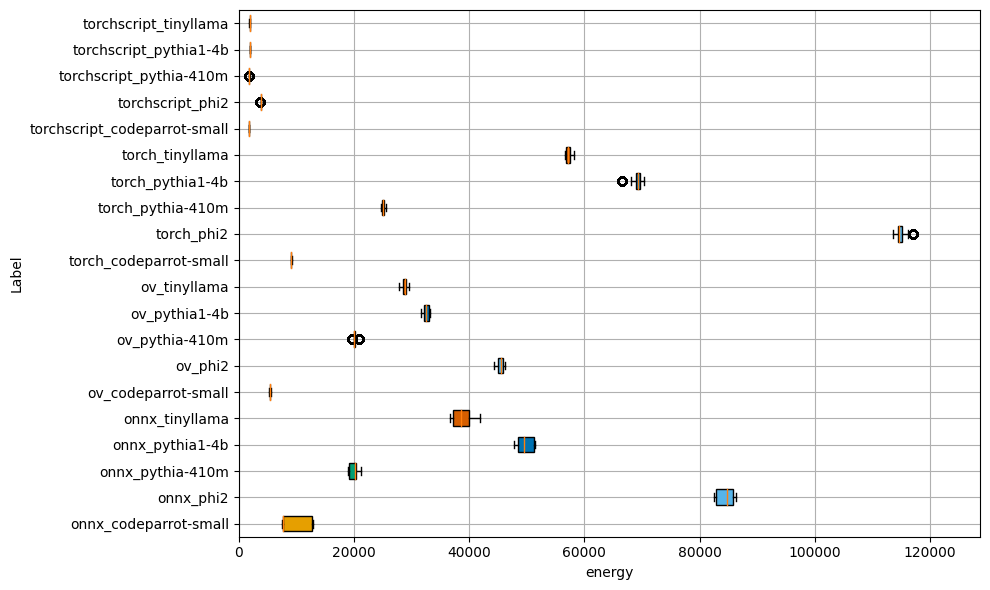

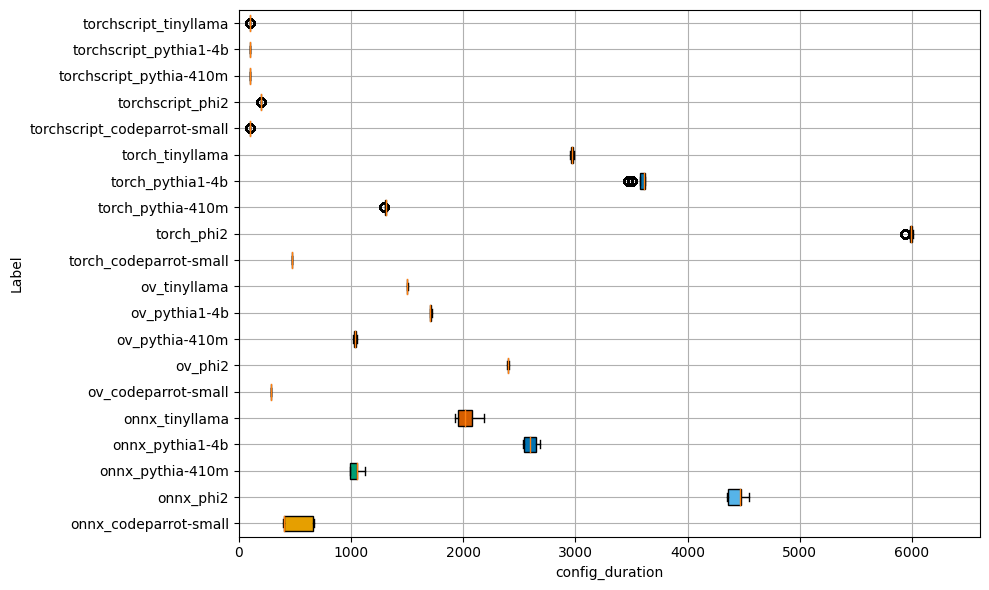

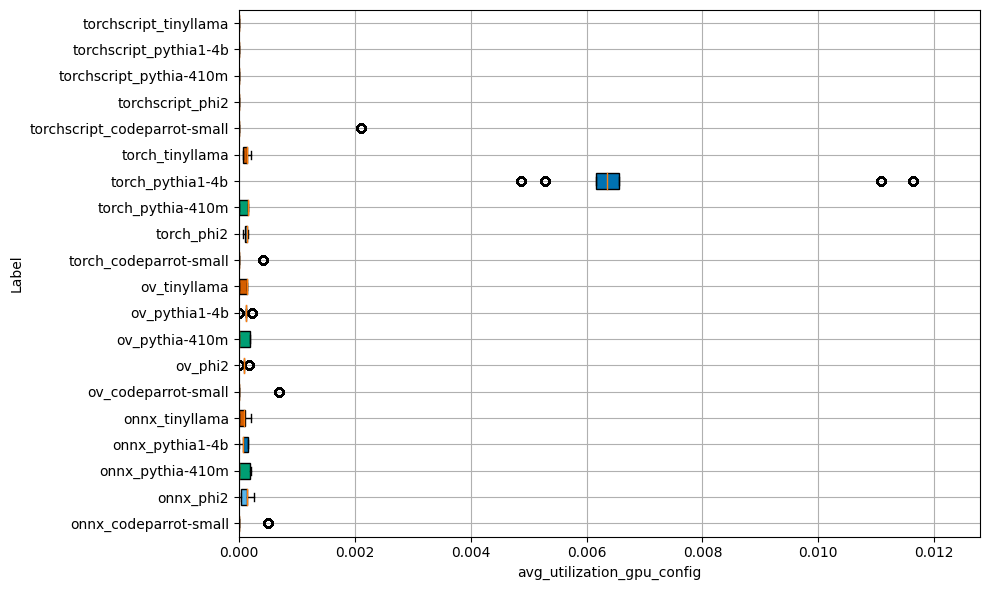

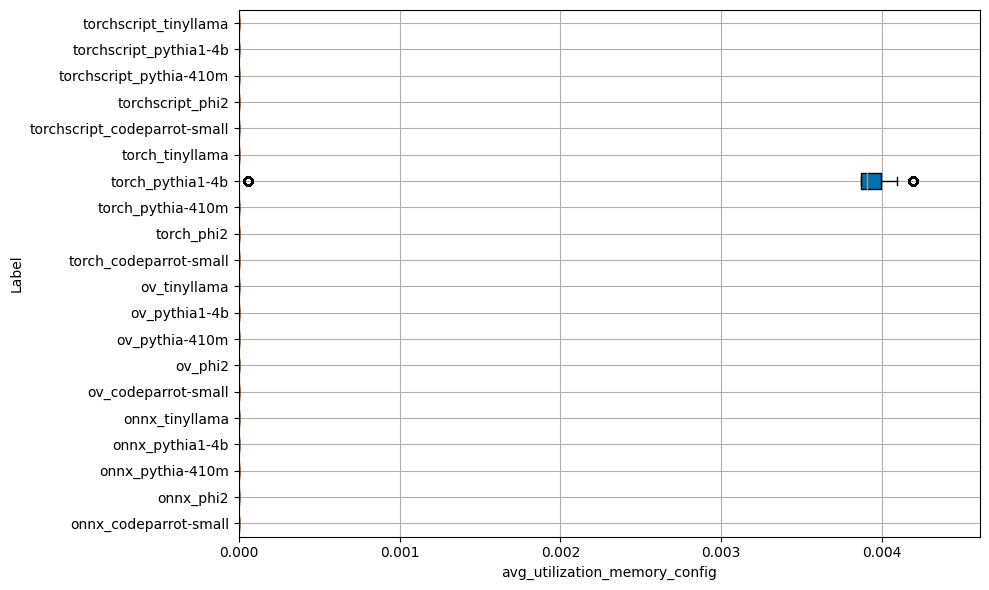

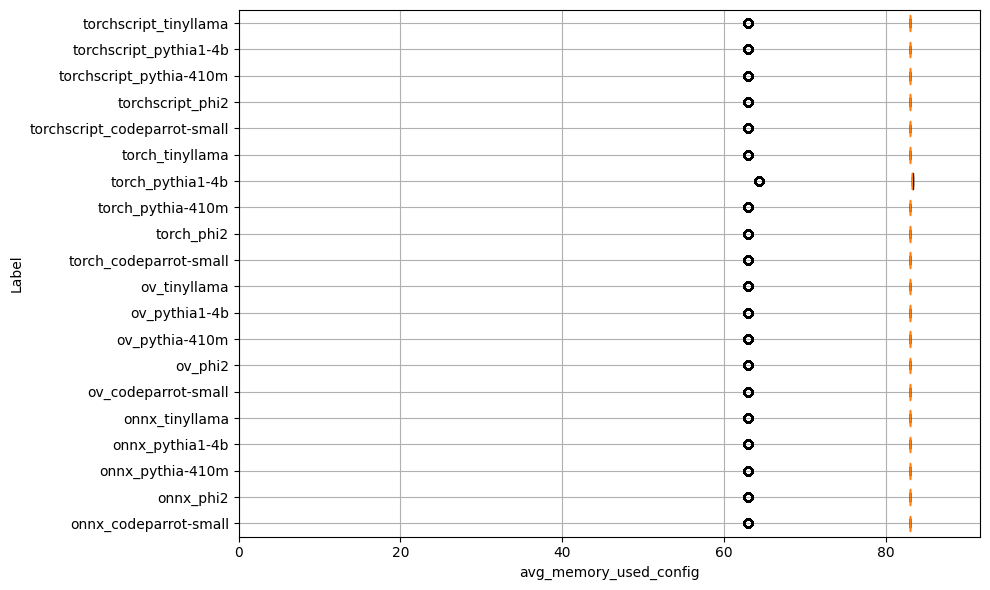

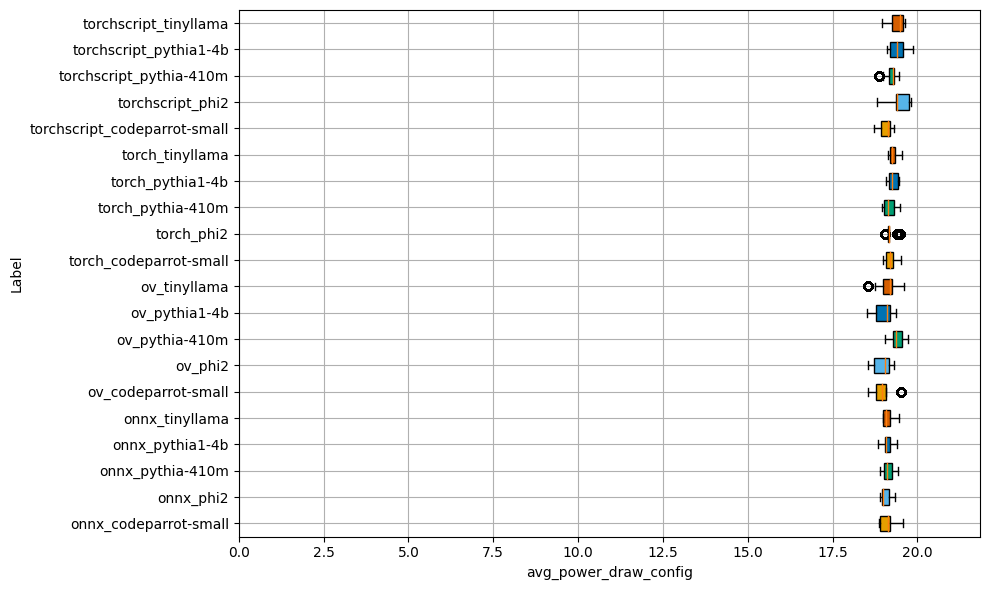

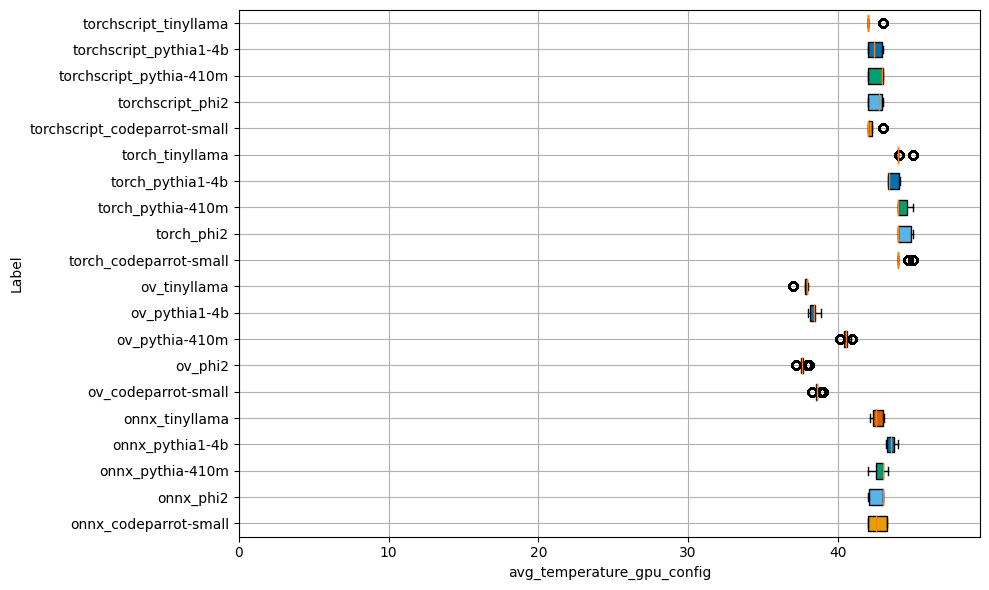

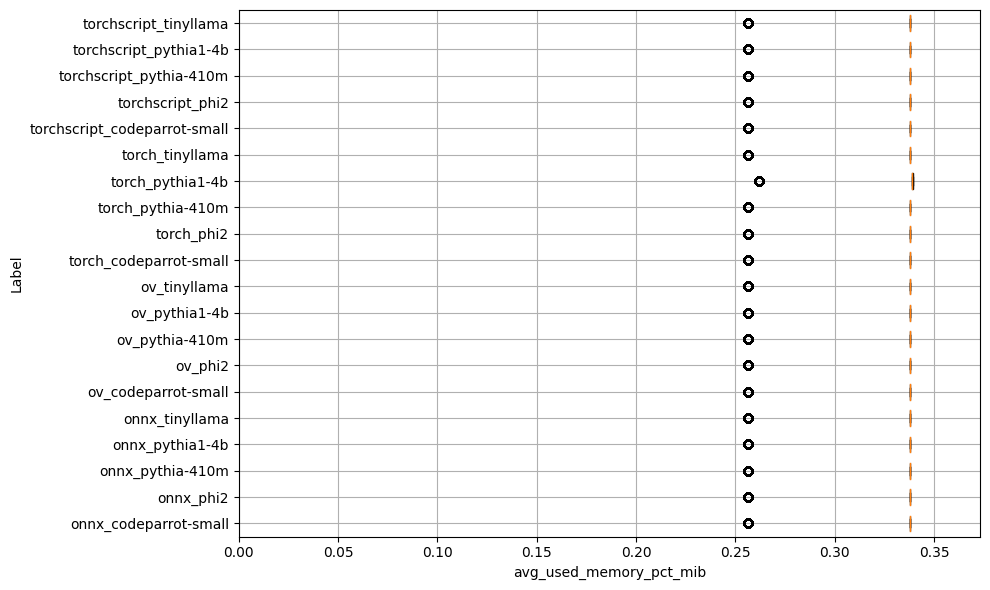

In [82]:
variables_to_plot = ['Energy (Nvidia-smi) [J]','Execution time (Nvidia-smi) [s]','GPU usage (Nvidia-smi) [%]',
                     'Used memory (Nvidia-smi) [%]','Used GPU memory (Nvidia-smi) [MiB]' ,'GPU temperature (Nvidia-smi) [°]']

variables_to_plot = ['energy','config_duration','avg_utilization_gpu_config','avg_utilization_memory_config','avg_memory_used_config' ,
                     'avg_power_draw_config','avg_temperature_gpu_config','avg_used_memory_pct_mib']


# Define some colors for the boxes
colors = ['blue', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'orange', 'yellow', 'cyan']
colors=["#E69F00", "#56B4E9", "#009E73", "#0072B2", "#D55E00", "#CC79A7", "#F0E442"]
colors = colors[:num_models]

# Make the color list cyclic in case there are more groups than colors
color_cycle = itertools.cycle(colors)

n=0
# Generate box plots
for variable in variables_to_plot:
    plt.figure(figsize=(10, 6))
    
    # Group data by 'label'
    grouped = nvidia_plot.groupby('label')
    
    # We need to know the number of groups
    num_groups = len(grouped)
    
    # Creating a box for each group
    for i, (name, group) in enumerate(grouped):
        # Plot only the part of the data for this group
        # `positions` gives the position of the box in the plot
        plt.boxplot(group[variable].dropna(), positions=[i], widths=0.6, vert=False, patch_artist=True,
                    boxprops=dict(facecolor=next(color_cycle)))  # Use cyclic color

    # Customizing plot
    #plt.title(f'Box Plot of {variable} by Label')
    plt.xlabel(variable)
    plt.yticks(np.arange(num_groups), grouped.groups.keys())  # Set y-ticks to group names
    plt.ylabel('Label')

    plt.xlim([0,nvidia_plot[variable].max()*1.1])
    plt.grid(True)
    
    plt.tight_layout()  # Adjust layout to make room for labels
    
    plt.savefig(save_dir + "nvidia_"+variable) if SAVE_FIGS else print(f"SAVE_FIGS:{SAVE_FIGS}")
    n+=1
plt.show()


In [83]:
nvidia_plot.columns

Index(['time', 'runtime', 'model', ' utilization.gpu [%]',
       ' utilization.memory [%]', ' memory.total [MiB]', ' memory.used [MiB]',
       ' power.draw [W]', ' power.max_limit [W]', ' temperature.gpu', 'label',
       'used_memory_pct_mib', 'avg_utilization_gpu_config',
       'avg_utilization_memory_config', 'avg_memory_used_config',
       'avg_power_draw_config', 'avg_temperature_gpu_config',
       'avg_used_memory_pct_mib', 'config_duration', 'energy', 'experiment'],
      dtype='object')

In [84]:
resource_nvidia = nvidia_plot[['label','experiment','config_duration','avg_utilization_gpu_config','avg_utilization_memory_config','avg_memory_used_config' ,
                     'avg_power_draw_config','avg_temperature_gpu_config','avg_used_memory_pct_mib']]
#variables_to_plot = ['Energy (Nvidia-smi) [J]','Execution time (Nvidia-smi) [s]','GPU usage (Nvidia-smi) [%]','Used memory (Nvidia-smi) [%]','Used GPU memory (Nvidia-smi) [MiB]' ,'GPU temperature (Nvidia-smi) [°]']
#variables_to_plot = ['energy','config_duration','avg_utilization_gpu_config','avg_utilization_memory_config','avg_memory_used_config' ,
#                     'avg_power_draw_config','avg_temperature_gpu_config','avg_used_memory_pct_mib']
resource_nvidia

,label,experiment,config_duration,avg_utilization_gpu_config,avg_utilization_memory_config,avg_memory_used_config,avg_power_draw_config,avg_temperature_gpu_config,avg_used_memory_pct_mib
0,torch_pythia1-4b,1,3466.257,0.005282,0.000058,83.304312,19.191973,44.111150,0.339132
1,torch_pythia1-4b,1,3466.257,0.005282,0.000058,83.304312,19.191973,44.111150,0.339132
2,torch_pythia1-4b,1,3466.257,0.005282,0.000058,83.304312,19.191973,44.111150,0.339132
3,torch_pythia1-4b,1,3466.257,0.005282,0.000058,83.304312,19.191973,44.111150,0.339132
4,torch_pythia1-4b,1,3466.257,0.005282,0.000058,83.304312,19.191973,44.111150,0.339132
...,...,...,...,...,...,...,...,...,...
3221086,ov_phi2,9,2401.964,0.000084,0.000000,83.000000,19.032492,37.567734,0.337893
3221087,ov_phi2,9,2401.964,0.000084,0.000000,83.000000,19.032492,37.567734,0.337893
3221088,ov_phi2,9,2401.964,0.000084,0.000000,83.000000,19.032492,37.567734,0.337893
3221089,ov_phi2,9,2401.964,0.000084,0.000000,83.000000,19.032492,37.567734,0.337893


In [85]:
resource_nvidia.to_csv(tables_dir+'final_nvidia_data.csv', index=False) if SAVE_TABLES else print(f"SAVE_TABLES:{SAVE_TABLES}")

In [86]:
resource_nvidia = resource_nvidia.drop(columns = ['experiment'])

In [87]:
# Calculate mean values for each label
df = resource_nvidia
median_resource_nvidia = df.groupby('label').median()

# Optionally, you might want to reset the index if you need 'label' as a column
median_resource_nvidia.reset_index(inplace=True)

#median_energy_values = median_energy_values.drop(columns = ['experiment'])
median_resource_nvidia

,label,config_duration,avg_utilization_gpu_config,avg_utilization_memory_config,avg_memory_used_config,avg_power_draw_config,avg_temperature_gpu_config,avg_used_memory_pct_mib
0,onnx_codeparrot-small,402.181,0.000000,0.000000,83.000000,19.133810,42.568295,0.337893
1,onnx_phi2,4470.892,0.000135,0.000000,83.000000,18.994181,42.999933,0.337893
2,onnx_pythia-410m,1055.912,0.000000,0.000000,83.000000,19.091516,43.000000,0.337893
3,onnx_pythia1-4b,2595.709,0.000079,0.000000,83.000000,19.083839,43.546612,0.337893
4,onnx_tinyllama,2017.491,0.000097,0.000000,83.000000,19.079100,42.568831,0.337893
5,ov_codeparrot-small,287.735,0.000000,0.000000,83.000000,18.967442,38.619432,0.337893
6,ov_phi2,2396.038,0.000084,0.000000,83.000000,19.030938,37.609355,0.337893
7,ov_pythia-410m,1036.357,0.000000,0.000000,83.000000,19.363998,40.562116,0.337893
8,ov_pythia1-4b,1708.428,0.000118,0.000000,83.000000,19.088271,38.429494,0.337893
9,ov_tinyllama,1502.977,0.000134,0.000000,83.000000,19.178637,37.920850,0.337893


In [88]:
# Split the 'label' column into 'runtime' and 'model'
median_resource_nvidia[['runtime', 'model']] = median_resource_nvidia['label'].str.split('_', n=1, expand=True)
median_resource_nvidia

,label,config_duration,avg_utilization_gpu_config,avg_utilization_memory_config,avg_memory_used_config,avg_power_draw_config,avg_temperature_gpu_config,avg_used_memory_pct_mib,runtime,model
0,onnx_codeparrot-small,402.181,0.000000,0.000000,83.000000,19.133810,42.568295,0.337893,onnx,codeparrot-small
1,onnx_phi2,4470.892,0.000135,0.000000,83.000000,18.994181,42.999933,0.337893,onnx,phi2
2,onnx_pythia-410m,1055.912,0.000000,0.000000,83.000000,19.091516,43.000000,0.337893,onnx,pythia-410m
3,onnx_pythia1-4b,2595.709,0.000079,0.000000,83.000000,19.083839,43.546612,0.337893,onnx,pythia1-4b
4,onnx_tinyllama,2017.491,0.000097,0.000000,83.000000,19.079100,42.568831,0.337893,onnx,tinyllama
5,ov_codeparrot-small,287.735,0.000000,0.000000,83.000000,18.967442,38.619432,0.337893,ov,codeparrot-small
6,ov_phi2,2396.038,0.000084,0.000000,83.000000,19.030938,37.609355,0.337893,ov,phi2
7,ov_pythia-410m,1036.357,0.000000,0.000000,83.000000,19.363998,40.562116,0.337893,ov,pythia-410m
8,ov_pythia1-4b,1708.428,0.000118,0.000000,83.000000,19.088271,38.429494,0.337893,ov,pythia1-4b
9,ov_tinyllama,1502.977,0.000134,0.000000,83.000000,19.178637,37.920850,0.337893,ov,tinyllama


In [89]:
# Define the new order of the columns
#new_order = ['label', 'Used memory (Energibridge) [B]','CPU usage (Energibridge) [%]', 'runtime', 'model']
new_order= list(median_resource_nvidia.columns[-2:]) + list(median_resource_nvidia.columns[:-2])
# Reorder the columns by indexing in the new order
median_resource_nvidia = median_resource_nvidia[new_order]
median_resource_nvidia

,runtime,model,label,config_duration,avg_utilization_gpu_config,avg_utilization_memory_config,avg_memory_used_config,avg_power_draw_config,avg_temperature_gpu_config,avg_used_memory_pct_mib
0,onnx,codeparrot-small,onnx_codeparrot-small,402.181,0.000000,0.000000,83.000000,19.133810,42.568295,0.337893
1,onnx,phi2,onnx_phi2,4470.892,0.000135,0.000000,83.000000,18.994181,42.999933,0.337893
2,onnx,pythia-410m,onnx_pythia-410m,1055.912,0.000000,0.000000,83.000000,19.091516,43.000000,0.337893
3,onnx,pythia1-4b,onnx_pythia1-4b,2595.709,0.000079,0.000000,83.000000,19.083839,43.546612,0.337893
4,onnx,tinyllama,onnx_tinyllama,2017.491,0.000097,0.000000,83.000000,19.079100,42.568831,0.337893
5,ov,codeparrot-small,ov_codeparrot-small,287.735,0.000000,0.000000,83.000000,18.967442,38.619432,0.337893
6,ov,phi2,ov_phi2,2396.038,0.000084,0.000000,83.000000,19.030938,37.609355,0.337893
7,ov,pythia-410m,ov_pythia-410m,1036.357,0.000000,0.000000,83.000000,19.363998,40.562116,0.337893
8,ov,pythia1-4b,ov_pythia1-4b,1708.428,0.000118,0.000000,83.000000,19.088271,38.429494,0.337893
9,ov,tinyllama,ov_tinyllama,1502.977,0.000134,0.000000,83.000000,19.178637,37.920850,0.337893


In [90]:
median_resource_nvidia.to_csv(tables_dir+'median_resource_nvidia.csv', index=False) if SAVE_TABLES else print(f"SAVE_TABLES:{SAVE_TABLES}")


In [91]:
median_resource_nvidia = median_resource_nvidia.drop(columns = ['label'])


In [92]:
filename = tables_dir + 'median_resource_nvidia.tex'
save_latex_table(median_resource_nvidia,filename)

\begin{tabular}{llrrrrrrr}
\toprule
runtime & model & config duration & avg utilization gpu config & avg utilization memory config & avg memory used config & avg power draw config & avg temperature gpu config & avg used memory pct mib \\
\midrule
onnx & codeparrot-small & 402.181000 & 0.000000 & 0.000000 & 83.000000 & 19.133810 & 42.568295 & 0.337893 \\
onnx & phi2 & 4470.892000 & 0.000135 & 0.000000 & 83.000000 & 18.994181 & 42.999933 & 0.337893 \\
onnx & pythia-410m & 1055.912000 & 0.000000 & 0.000000 & 83.000000 & 19.091516 & 43.000000 & 0.337893 \\
onnx & pythia1-4b & 2595.709000 & 0.000079 & 0.000000 & 83.000000 & 19.083839 & 43.546612 & 0.337893 \\
onnx & tinyllama & 2017.491000 & 0.000097 & 0.000000 & 83.000000 & 19.079100 & 42.568831 & 0.337893 \\
ov & codeparrot-small & 287.735000 & 0.000000 & 0.000000 & 83.000000 & 18.967442 & 38.619432 & 0.337893 \\
ov & phi2 & 2396.038000 & 0.000084 & 0.000000 & 83.000000 & 19.030938 & 37.609355 & 0.337893 \\
ov & pythia-410m & 1036.357000 

In [93]:
# # Convert DataFrame to LaTeX table
# latex_table = median_resource_nvidia.to_latex(index=False)

# # Define the filename
# filename = tables_dir + 'median_resource_nvidia.tex'

# # Open the file in write mode
# with open(filename, 'w') as file:
#     file.write(latex_table)

# # Print LaTeX table
# print(latex_table)

## Other: Wattmeter: 'Current [mA]','Power Factor [-]','Phase [°]' ,'Load [W]'

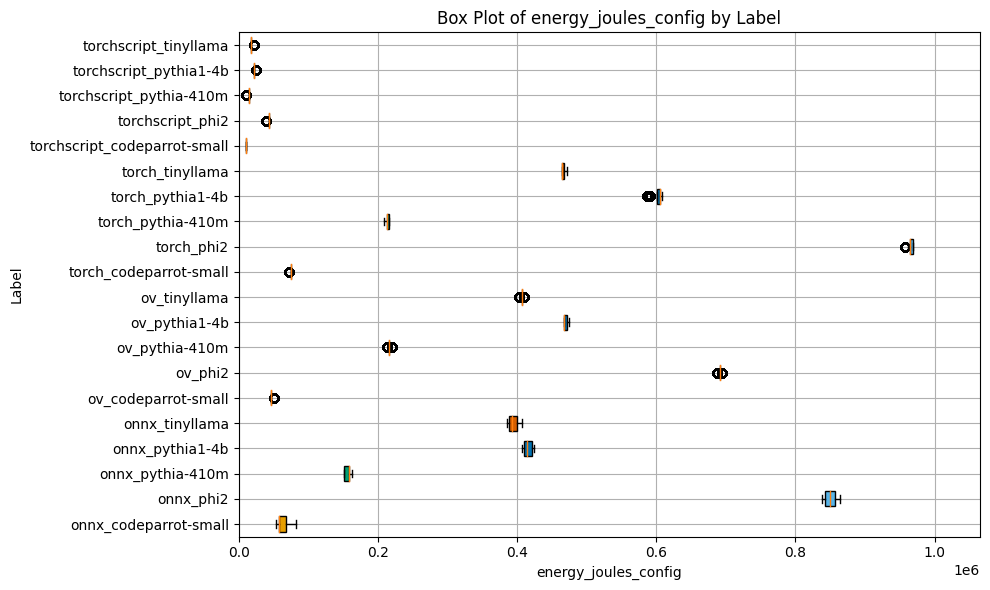

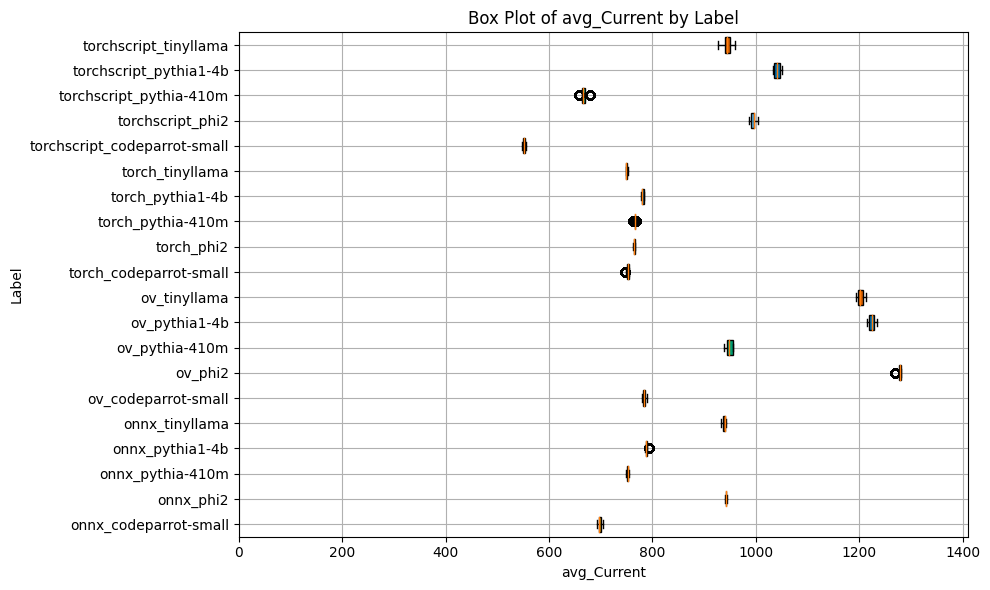

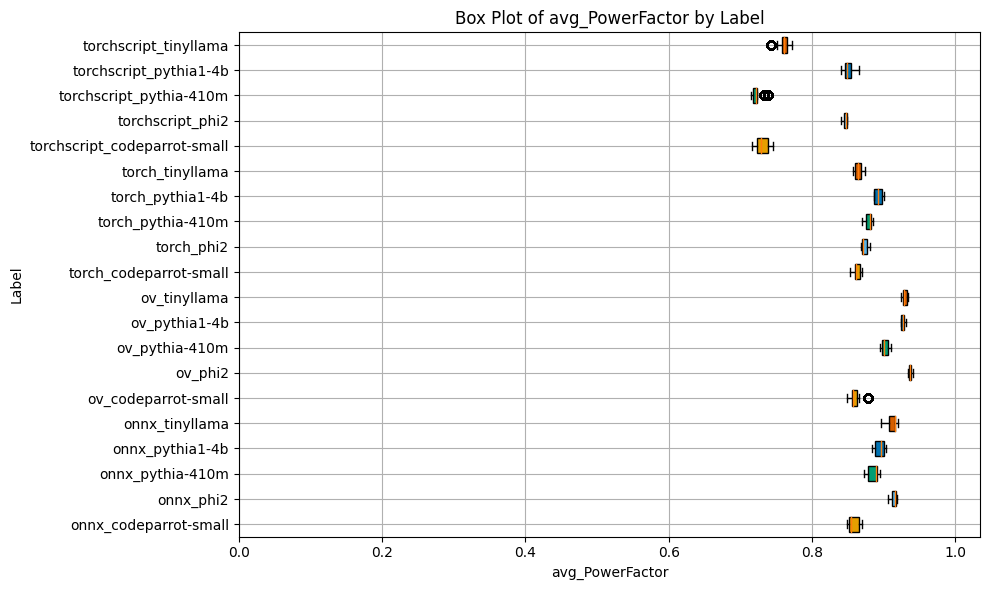

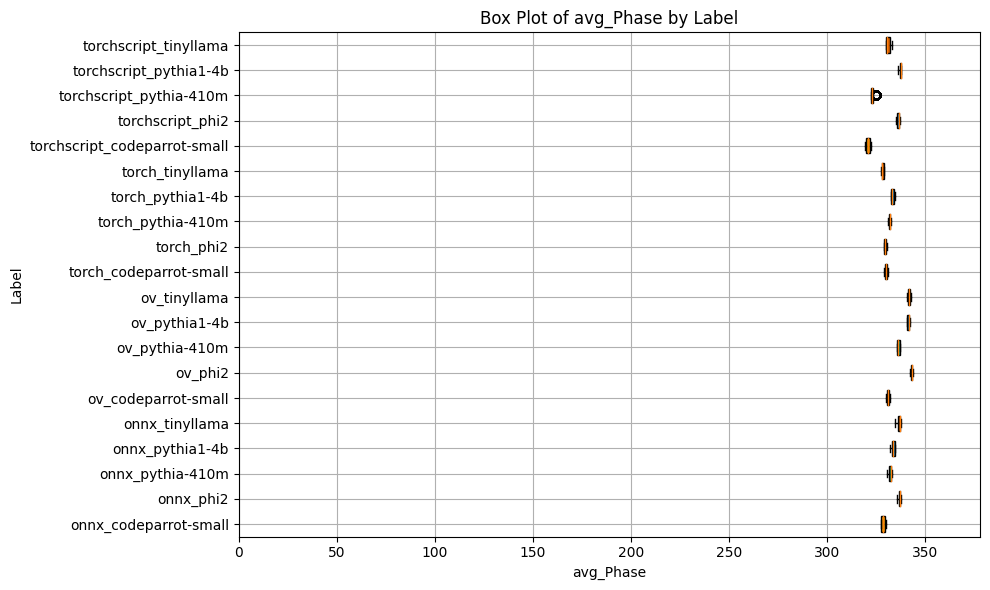

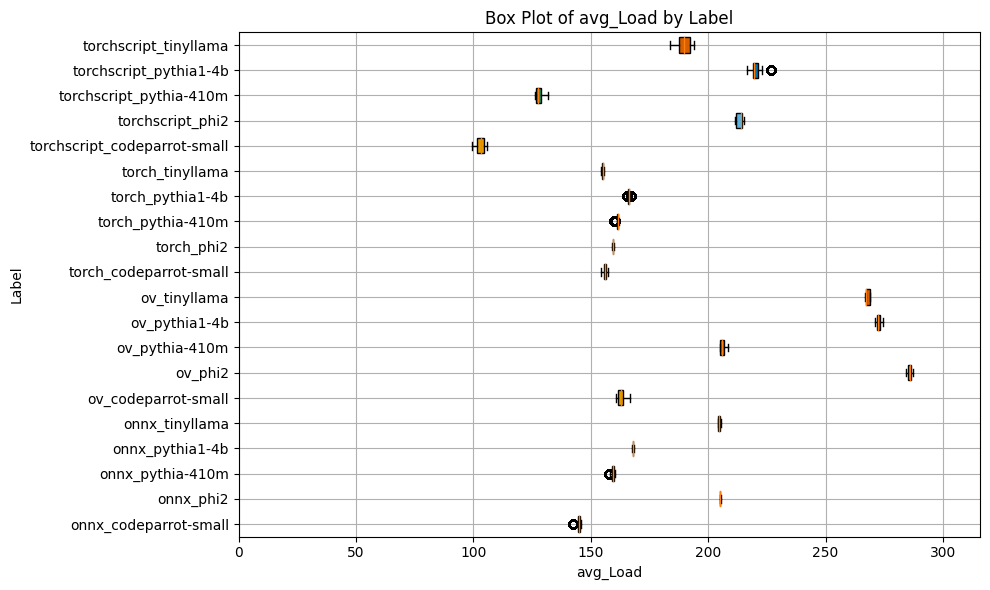

In [94]:
#variables_to_plot = ['Energy (Wattmeter) [J]','Current [mA]','Power Factor [-]','Phase [°]' ,'Load [W]']
variables_to_plot = ['energy_joules_config','avg_Current','avg_PowerFactor','avg_Phase' ,'avg_Load']

# Define some colors for the boxes
colors = ['blue', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'orange', 'yellow', 'cyan']
colors=["#E69F00", "#56B4E9", "#009E73", "#0072B2", "#D55E00", "#CC79A7", "#F0E442"]
colors = colors[:num_models]

# Make the color list cyclic in case there are more groups than colors
color_cycle = itertools.cycle(colors)

# Generate box plots
for variable in variables_to_plot:
    plt.figure(figsize=(10, 6))
    
    # Group data by 'label'
    grouped = wattmeter_plot.groupby('label')
    
    # We need to know the number of groups
    num_groups = len(grouped)
    
    # Creating a box for each group
    for i, (name, group) in enumerate(grouped):
        # Plot only the part of the data for this group
        # `positions` gives the position of the box in the plot
        plt.boxplot(group[variable].dropna(), positions=[i], widths=0.6, vert=False, patch_artist=True,
                    boxprops=dict(facecolor=next(color_cycle)))  # Use cyclic color

    # Customizing plot
    plt.title(f'Box Plot of {variable} by Label')
    plt.xlabel(variable)
    plt.yticks(np.arange(num_groups), grouped.groups.keys())  # Set y-ticks to group names
    plt.ylabel('Label')
    plt.xlim([0,wattmeter_plot[variable].max()*1.1])
    plt.grid(True)
    
    plt.tight_layout()  # Adjust layout to make room for labels
    plt.savefig(save_dir + "wattmeter_"+variable) if SAVE_FIGS else print(f"SAVE_FIGS:{SAVE_FIGS}")

plt.show()


In [95]:
wattmeter_plot.columns

Index(['time', 'runtime', 'model', 'Current', 'PowerFactor', 'Phase', 'Energy',
       'EnergyNR', 'Load', 'label', 'energy_joules', 'energyNR_joules',
       'energy_joules_config', 'energyNR_joules_config', 'avg_Current',
       'avg_PowerFactor', 'avg_Phase', 'avg_Load', 'experiment'],
      dtype='object')

In [96]:
#variables_to_plot = ['Energy (Wattmeter) [J]','Current [mA]','Power Factor [-]','Phase [°]' ,'Load [W]']
#variables_to_plot = ['energy_joules_config','avg_Current','avg_PowerFactor','avg_Phase' ,'avg_Load']

resource_wattmeter = wattmeter_plot[['label','experiment','avg_Current','avg_PowerFactor','avg_Phase' ,'avg_Load']]
resource_wattmeter

,label,experiment,avg_Current,avg_PowerFactor,avg_Phase,avg_Load
0,torch_pythia1-4b,1,784.274255,0.900857,334.525908,167.053919
1,torch_pythia1-4b,1,784.274255,0.900857,334.525908,167.053919
2,torch_pythia1-4b,1,784.274255,0.900857,334.525908,167.053919
3,torch_pythia1-4b,1,784.274255,0.900857,334.525908,167.053919
4,torch_pythia1-4b,1,784.274255,0.900857,334.525908,167.053919
...,...,...,...,...,...,...
520569,ov_phi2,9,1280.380906,0.940393,343.705622,286.220829
520570,ov_phi2,9,1280.380906,0.940393,343.705622,286.220829
520571,ov_phi2,9,1280.380906,0.940393,343.705622,286.220829
520572,ov_phi2,9,1280.380906,0.940393,343.705622,286.220829


In [97]:
resource_wattmeter.to_csv(tables_dir+'final_wattmeter_data.csv', index=False) if SAVE_TABLES else print(f"SAVE_TABLES:{SAVE_TABLES}")

In [98]:
resource_wattmeter = resource_wattmeter.drop(columns = ['experiment'])

In [99]:
# Calculate mean values for each label
df = resource_wattmeter
median_resource_wattmeter = df.groupby('label').median()

# Optionally, you might want to reset the index if you need 'label' as a column
median_resource_wattmeter.reset_index(inplace=True)

#median_energy_values = median_energy_values.drop(columns = ['experiment'])
median_resource_wattmeter

,label,avg_Current,avg_PowerFactor,avg_Phase,avg_Load
0,onnx_codeparrot-small,697.511156,0.853851,328.431351,145.048980
1,onnx_phi2,942.306588,0.915601,337.194537,205.108937
2,onnx_pythia-410m,752.164035,0.889007,332.497417,159.360281
3,onnx_pythia1-4b,788.134774,0.896344,333.744308,167.935429
4,onnx_tinyllama,939.534110,0.915516,337.313600,204.472497
5,ov_codeparrot-small,784.195122,0.856799,331.340041,162.944106
6,ov_phi2,1278.294884,0.936150,343.245075,285.792771
7,ov_pythia-410m,948.456208,0.900797,336.469966,205.813026
8,ov_pythia1-4b,1223.770869,0.927178,341.664078,272.190234
9,ov_tinyllama,1200.780008,0.927865,341.865347,267.213817


In [100]:
# Split the 'label' column into 'runtime' and 'model'
median_resource_wattmeter[['runtime', 'model']] = median_resource_wattmeter['label'].str.split('_', n=1, expand=True)
median_resource_wattmeter

,label,avg_Current,avg_PowerFactor,avg_Phase,avg_Load,runtime,model
0,onnx_codeparrot-small,697.511156,0.853851,328.431351,145.048980,onnx,codeparrot-small
1,onnx_phi2,942.306588,0.915601,337.194537,205.108937,onnx,phi2
2,onnx_pythia-410m,752.164035,0.889007,332.497417,159.360281,onnx,pythia-410m
3,onnx_pythia1-4b,788.134774,0.896344,333.744308,167.935429,onnx,pythia1-4b
4,onnx_tinyllama,939.534110,0.915516,337.313600,204.472497,onnx,tinyllama
5,ov_codeparrot-small,784.195122,0.856799,331.340041,162.944106,ov,codeparrot-small
6,ov_phi2,1278.294884,0.936150,343.245075,285.792771,ov,phi2
7,ov_pythia-410m,948.456208,0.900797,336.469966,205.813026,ov,pythia-410m
8,ov_pythia1-4b,1223.770869,0.927178,341.664078,272.190234,ov,pythia1-4b
9,ov_tinyllama,1200.780008,0.927865,341.865347,267.213817,ov,tinyllama


In [101]:
# Define the new order of the columns
#new_order = ['label', 'Used memory (Energibridge) [B]','CPU usage (Energibridge) [%]', 'runtime', 'model']
new_order= list(median_resource_wattmeter.columns[-2:]) + list(median_resource_wattmeter.columns[:-2])
# Reorder the columns by indexing in the new order
median_resource_wattmeter = median_resource_wattmeter[new_order]
median_resource_wattmeter

,runtime,model,label,avg_Current,avg_PowerFactor,avg_Phase,avg_Load
0,onnx,codeparrot-small,onnx_codeparrot-small,697.511156,0.853851,328.431351,145.048980
1,onnx,phi2,onnx_phi2,942.306588,0.915601,337.194537,205.108937
2,onnx,pythia-410m,onnx_pythia-410m,752.164035,0.889007,332.497417,159.360281
3,onnx,pythia1-4b,onnx_pythia1-4b,788.134774,0.896344,333.744308,167.935429
4,onnx,tinyllama,onnx_tinyllama,939.534110,0.915516,337.313600,204.472497
5,ov,codeparrot-small,ov_codeparrot-small,784.195122,0.856799,331.340041,162.944106
6,ov,phi2,ov_phi2,1278.294884,0.936150,343.245075,285.792771
7,ov,pythia-410m,ov_pythia-410m,948.456208,0.900797,336.469966,205.813026
8,ov,pythia1-4b,ov_pythia1-4b,1223.770869,0.927178,341.664078,272.190234
9,ov,tinyllama,ov_tinyllama,1200.780008,0.927865,341.865347,267.213817


In [102]:
median_resource_wattmeter.to_csv(tables_dir+'median_resource_wattmeter.csv', index=False)  if SAVE_TABLES else print(f"SAVE_TABLES:{SAVE_TABLES}")



In [103]:
median_resource_wattmeter = median_resource_wattmeter.drop(columns = ['label'])


In [104]:
filename = tables_dir + 'median_resource_wattmeter.tex'
save_latex_table(median_resource_wattmeter,filename)

\begin{tabular}{llrrrr}
\toprule
runtime & model & avg Current & avg PowerFactor & avg Phase & avg Load \\
\midrule
onnx & codeparrot-small & 697.511156 & 0.853851 & 328.431351 & 145.048980 \\
onnx & phi2 & 942.306588 & 0.915601 & 337.194537 & 205.108937 \\
onnx & pythia-410m & 752.164035 & 0.889007 & 332.497417 & 159.360281 \\
onnx & pythia1-4b & 788.134774 & 0.896344 & 333.744308 & 167.935429 \\
onnx & tinyllama & 939.534110 & 0.915516 & 337.313600 & 204.472497 \\
ov & codeparrot-small & 784.195122 & 0.856799 & 331.340041 & 162.944106 \\
ov & phi2 & 1278.294884 & 0.936150 & 343.245075 & 285.792771 \\
ov & pythia-410m & 948.456208 & 0.900797 & 336.469966 & 205.813026 \\
ov & pythia1-4b & 1223.770869 & 0.927178 & 341.664078 & 272.190234 \\
ov & tinyllama & 1200.780008 & 0.927865 & 341.865347 & 267.213817 \\
torch & codeparrot-small & 752.466463 & 0.861585 & 330.009537 & 156.060976 \\
torch & phi2 & 764.376671 & 0.871203 & 329.620652 & 159.306990 \\
torch & pythia-410m & 765.935271 & 0.

In [105]:
# # Convert DataFrame to LaTeX table
# latex_table = median_resource_wattmeter.to_latex(index=False)


# # Define the filename
# filename = tables_dir + 'median_resource_wattmeter.tex'

# # Open the file in write mode
# with open(filename, 'w') as file:
#     file.write(latex_table)


# # Print LaTeX table
# print(latex_table)

# Execution time


## Duration

In [106]:
# Path where the CSV files are stored
path = f"D:/GAISSA/energy-repo/last_repo/june_{device}/"  # Adjust this path to your CSV files location
all_files = glob.glob(path + "/results_*/processed/time_marks.csv")
#all_files=all_files[:4]
all_files

['D:/GAISSA/energy-repo/last_repo/june_cpu\\results_1\\processed\\time_marks.csv',
 'D:/GAISSA/energy-repo/last_repo/june_cpu\\results_10\\processed\\time_marks.csv',
 'D:/GAISSA/energy-repo/last_repo/june_cpu\\results_2\\processed\\time_marks.csv',
 'D:/GAISSA/energy-repo/last_repo/june_cpu\\results_3\\processed\\time_marks.csv',
 'D:/GAISSA/energy-repo/last_repo/june_cpu\\results_4\\processed\\time_marks.csv',
 'D:/GAISSA/energy-repo/last_repo/june_cpu\\results_5\\processed\\time_marks.csv',
 'D:/GAISSA/energy-repo/last_repo/june_cpu\\results_6\\processed\\time_marks.csv',
 'D:/GAISSA/energy-repo/last_repo/june_cpu\\results_7\\processed\\time_marks.csv',
 'D:/GAISSA/energy-repo/last_repo/june_cpu\\results_8\\processed\\time_marks.csv',
 'D:/GAISSA/energy-repo/last_repo/june_cpu\\results_9\\processed\\time_marks.csv']

In [107]:
result_numbers = []

li = []
for my_file in all_files:
    # The regex pattern to find "results_" followed by one or more digits
    df = pd.read_csv(my_file, index_col=None, header=0)
    
    match = re.search(r'results_(\d+)', my_file)
    if match:
        # Append the found number to the list
        result_numbers.append(int(match.group(1)))

    df['experiment'] = result_numbers[-1]
    li.append(df)

print(result_numbers)
# Combine all data into one DataFrame
time_df = pd.concat(li, axis=0, ignore_index=True)
time_df

[1, 10, 2, 3, 4, 5, 6, 7, 8, 9]


,time,runtime,model,engine,model_name,start_end,file,label,duration,label_time,experiment
0,2024-06-12 02:19:20.000000,-,IDLE,NaN,NaN,NaN,runall,idle,NaN,-_IDLE_inference,1
1,2024-06-12 02:24:20.000000,torch,START,NaN,NaN,NaN,runall,torch_START,300.000000,torch_START_inference,1
2,2024-06-12 02:24:21.358228,NaN,NaN,torch,pythia1-4b,1.0,load_times,torch_pythia1-4b,1.358228,NaN,1
3,2024-06-12 02:24:23.215555,NaN,NaN,torch,pythia1-4b,0.0,load_times,torch_pythia1-4b,1.857327,torch_pythia1-4b_load,1
4,2024-06-12 03:22:07.000000,torch,pythia1-4b,NaN,NaN,NaN,runall,torch_pythia1-4b,3463.784445,torch_pythia1-4b_inference,1
...,...,...,...,...,...,...,...,...,...,...,...
655,2024-06-16 12:10:37.000000,ov,pythia-410m,NaN,NaN,NaN,runall,ov_pythia-410m,1025.941273,ov_pythia-410m_inference,9
656,2024-06-16 12:10:37.960555,NaN,NaN,ov,phi2,1.0,load_times,ov_phi2,0.960555,NaN,9
657,2024-06-16 12:10:39.182769,NaN,NaN,ov,phi2,0.0,load_times,ov_phi2,1.222214,ov_phi2_load,9
658,2024-06-16 12:50:39.000000,ov,phi2,NaN,NaN,NaN,runall,ov_phi2,2399.817231,ov_phi2_inference,9


In [108]:
# ## add number of experiment

# # List to hold data from each file
# li = []

# # Read each file and append to list
# n=1
# for filename in all_files:
#     df = pd.read_csv(filename, index_col=None, header=0)
#     df['experiment'] = n
#     li.append(df)
#     n+=1
    

# # Combine all data into one DataFrame
# combined_df = pd.concat(li, axis=0, ignore_index=True)
# combined_df

In [109]:
time_df.columns

Index(['time', 'runtime', 'model', 'engine', 'model_name', 'start_end', 'file',
       'label', 'duration', 'label_time', 'experiment'],
      dtype='object')

In [110]:
variables_to_plot = ['duration', ]


In [111]:
time_df[time_df['label_time'].str.startswith('torch_', na=False) & time_df['label_time'].str.endswith('inference', na=False) ]

,time,runtime,model,engine,model_name,start_end,file,label,duration,label_time,experiment
1,2024-06-12 02:24:20.000000,torch,START,NaN,NaN,NaN,runall,torch_START,300.000000,torch_START_inference,1
4,2024-06-12 03:22:07.000000,torch,pythia1-4b,NaN,NaN,NaN,runall,torch_pythia1-4b,3463.784445,torch_pythia1-4b_inference,1
7,2024-06-12 04:11:22.000000,torch,tinyllama,NaN,NaN,NaN,runall,torch_tinyllama,2951.680044,torch_tinyllama_inference,1
10,2024-06-12 04:19:16.000000,torch,codeparrot-small,NaN,NaN,NaN,runall,torch_codeparrot-small,472.671935,torch_codeparrot-small_inference,1
13,2024-06-12 04:40:51.000000,torch,pythia-410m,NaN,NaN,NaN,runall,torch_pythia-410m,1293.560613,torch_pythia-410m_inference,1
16,2024-06-12 06:19:50.000000,torch,phi2,NaN,NaN,NaN,runall,torch_phi2,5934.051351,torch_phi2_inference,1
67,2024-06-16 12:55:40.000000,torch,START,NaN,NaN,NaN,runall,torch_START,300.000000,torch_START_inference,10
70,2024-06-16 13:55:54.000000,torch,pythia1-4b,NaN,NaN,NaN,runall,torch_pythia1-4b,3610.799059,torch_pythia1-4b_inference,10
73,2024-06-16 14:45:20.000000,torch,tinyllama,NaN,NaN,NaN,runall,torch_tinyllama,2963.104044,torch_tinyllama_inference,10
76,2024-06-16 14:53:13.000000,torch,codeparrot-small,NaN,NaN,NaN,runall,torch_codeparrot-small,471.637141,torch_codeparrot-small_inference,10


<Figure size 2000x600 with 0 Axes>

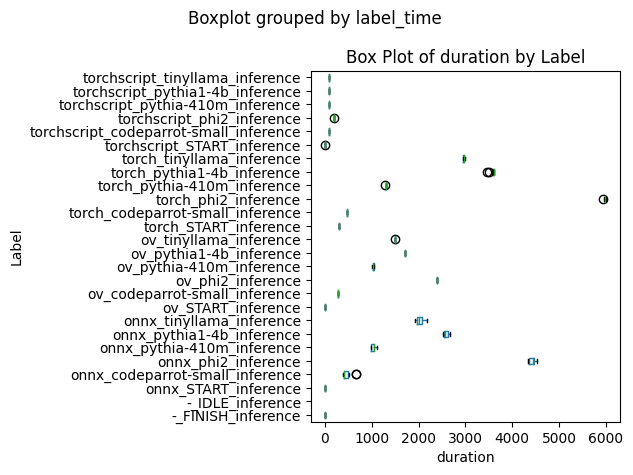

In [112]:

combined_df = time_df
# Assuming combined_df is already created and contains the data

# Define some colors for the boxes
colors = ['blue', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'orange', 'yellow', 'cyan']

# Make the color list cyclic in case there are more groups than colors
color_cycle = itertools.cycle(colors)


# Generate box plots
for variable in variables_to_plot:
    plt.figure(figsize=(20, 6))
    # Setting vert=False makes the box plots horizontal
    #plot_df = combined_df[combined_df['label_time'].str.startswith('torch_', na=False)]
    #plot_df = combined_df[combined_df['label_time'].str.startswith('torch_', na=False) & combined_df['label_time'].str.endswith('inference', na=False) ]
    plot_df = combined_df[ combined_df['label_time'].str.endswith('inference', na=False) ]
    
    plot_df.boxplot(column=variable, by='label_time', grid=False, vert=False) #df[df['A'].notna()]
    plt.title(f'Box Plot of {variable} by Label')
    plt.xlabel(variable)
    plt.ylabel('Label')
    plt.yticks(rotation=0)  # Rotate label ticks if necessary
    plt.tight_layout()  # Adjust layout to make room for labels
    #plt.xlim([0,20])
    #plt.savefig(path+"duration_runall")
plt.show()


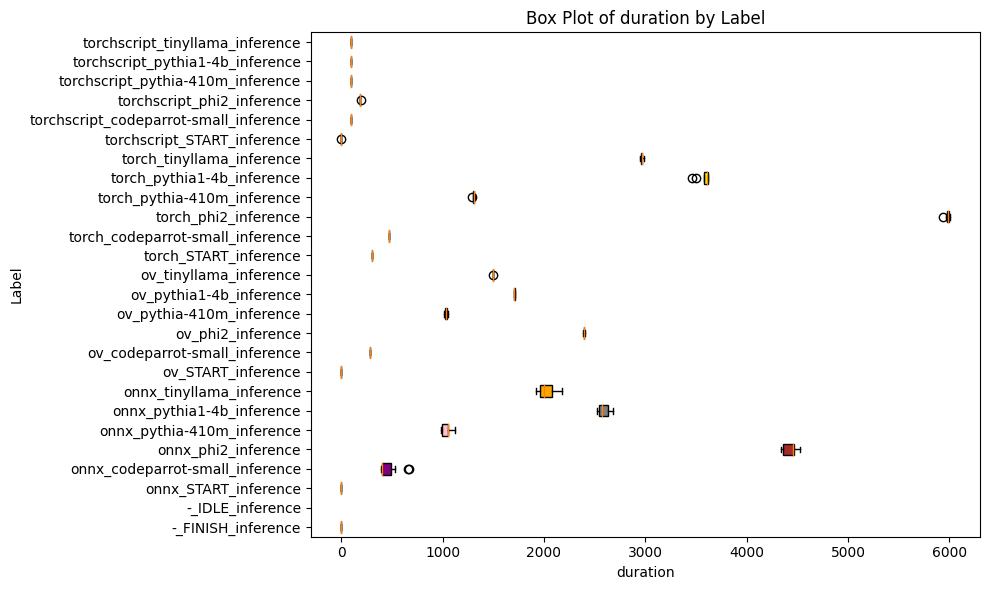

In [113]:

# Define some colors for the boxes
colors = ['blue', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'orange', 'yellow', 'cyan']

# Make the color list cyclic in case there are more groups than colors
color_cycle = itertools.cycle(colors)

# Generate box plots
for variable in variables_to_plot:
    plt.figure(figsize=(10, 6))
    
    # Group data by 'label'
    plot_df = combined_df[ combined_df['label_time'].str.endswith('inference', na=False) ]
    
    grouped = plot_df.groupby('label_time')
    
    # We need to know the number of groups
    num_groups = len(grouped)
    
    # Creating a box for each group
    for i, (name, group) in enumerate(grouped):
        # Plot only the part of the data for this group
        # `positions` gives the position of the box in the plot
        plt.boxplot(group[variable].dropna(), positions=[i], widths=0.6, vert=False, patch_artist=True,
                    boxprops=dict(facecolor=next(color_cycle)))  # Use cyclic color

    # Customizing plot
    plt.title(f'Box Plot of {variable} by Label')
    plt.xlabel(variable)
    plt.yticks(np.arange(num_groups), grouped.groups.keys())  # Set y-ticks to group names
    plt.ylabel('Label')
    plt.tight_layout()  # Adjust layout to make room for labels

plt.show()


In [114]:
#condition = time_df['label'].str.endswith('phi2')

#time_plot = remove_condition_rows( condition, time_df)
time_plot = time_df

time_plot

,time,runtime,model,engine,model_name,start_end,file,label,duration,label_time,experiment
0,2024-06-12 02:19:20.000000,-,IDLE,NaN,NaN,NaN,runall,idle,NaN,-_IDLE_inference,1
1,2024-06-12 02:24:20.000000,torch,START,NaN,NaN,NaN,runall,torch_START,300.000000,torch_START_inference,1
2,2024-06-12 02:24:21.358228,NaN,NaN,torch,pythia1-4b,1.0,load_times,torch_pythia1-4b,1.358228,NaN,1
3,2024-06-12 02:24:23.215555,NaN,NaN,torch,pythia1-4b,0.0,load_times,torch_pythia1-4b,1.857327,torch_pythia1-4b_load,1
4,2024-06-12 03:22:07.000000,torch,pythia1-4b,NaN,NaN,NaN,runall,torch_pythia1-4b,3463.784445,torch_pythia1-4b_inference,1
...,...,...,...,...,...,...,...,...,...,...,...
655,2024-06-16 12:10:37.000000,ov,pythia-410m,NaN,NaN,NaN,runall,ov_pythia-410m,1025.941273,ov_pythia-410m_inference,9
656,2024-06-16 12:10:37.960555,NaN,NaN,ov,phi2,1.0,load_times,ov_phi2,0.960555,NaN,9
657,2024-06-16 12:10:39.182769,NaN,NaN,ov,phi2,0.0,load_times,ov_phi2,1.222214,ov_phi2_load,9
658,2024-06-16 12:50:39.000000,ov,phi2,NaN,NaN,NaN,runall,ov_phi2,2399.817231,ov_phi2_inference,9


In [115]:
condition = time_plot['label'].str.startswith('-')
#remove_condition_rows( condition, energi_df)
#energi_df = energi_df[~condition]
time_plot = remove_condition_rows( condition, time_plot)

condition = time_plot['label'].str.startswith('idle')
time_plot = remove_condition_rows( condition, time_plot)

condition = time_plot['label'].str.startswith('finish')
time_plot = remove_condition_rows( condition, time_plot)

condition = time_plot['label'].str.endswith('START')
time_plot = remove_condition_rows( condition, time_plot)

time_plot

,time,runtime,model,engine,model_name,start_end,file,label,duration,label_time,experiment
2,2024-06-12 02:24:21.358228,NaN,NaN,torch,pythia1-4b,1.0,load_times,torch_pythia1-4b,1.358228,NaN,1
3,2024-06-12 02:24:23.215555,NaN,NaN,torch,pythia1-4b,0.0,load_times,torch_pythia1-4b,1.857327,torch_pythia1-4b_load,1
4,2024-06-12 03:22:07.000000,torch,pythia1-4b,NaN,NaN,NaN,runall,torch_pythia1-4b,3463.784445,torch_pythia1-4b_inference,1
5,2024-06-12 03:22:08.738740,NaN,NaN,torch,tinyllama,1.0,load_times,torch_tinyllama,1.738740,NaN,1
6,2024-06-12 03:22:10.319956,NaN,NaN,torch,tinyllama,0.0,load_times,torch_tinyllama,1.581216,torch_tinyllama_load,1
...,...,...,...,...,...,...,...,...,...,...,...
654,2024-06-16 11:53:31.058727,NaN,NaN,ov,pythia-410m,0.0,load_times,ov_pythia-410m,1.804212,ov_pythia-410m_load,9
655,2024-06-16 12:10:37.000000,ov,pythia-410m,NaN,NaN,NaN,runall,ov_pythia-410m,1025.941273,ov_pythia-410m_inference,9
656,2024-06-16 12:10:37.960555,NaN,NaN,ov,phi2,1.0,load_times,ov_phi2,0.960555,NaN,9
657,2024-06-16 12:10:39.182769,NaN,NaN,ov,phi2,0.0,load_times,ov_phi2,1.222214,ov_phi2_load,9


In [116]:
time_inference_df = time_plot[ time_plot['label_time'].str.endswith('inference', na=False) ]
print(len(time_inference_df))
time_inference_df

200


,time,runtime,model,engine,model_name,start_end,file,label,duration,label_time,experiment
4,2024-06-12 03:22:07.000000,torch,pythia1-4b,NaN,NaN,NaN,runall,torch_pythia1-4b,3463.784445,torch_pythia1-4b_inference,1
7,2024-06-12 04:11:22.000000,torch,tinyllama,NaN,NaN,NaN,runall,torch_tinyllama,2951.680044,torch_tinyllama_inference,1
10,2024-06-12 04:19:16.000000,torch,codeparrot-small,NaN,NaN,NaN,runall,torch_codeparrot-small,472.671935,torch_codeparrot-small_inference,1
13,2024-06-12 04:40:51.000000,torch,pythia-410m,NaN,NaN,NaN,runall,torch_pythia-410m,1293.560613,torch_pythia-410m_inference,1
16,2024-06-12 06:19:50.000000,torch,phi2,NaN,NaN,NaN,runall,torch_phi2,5934.051351,torch_phi2_inference,1
...,...,...,...,...,...,...,...,...,...,...,...
646,2024-06-16 11:23:37.000000,ov,pythia1-4b,NaN,NaN,NaN,runall,ov_pythia1-4b,1705.392279,ov_pythia1-4b_inference,9
649,2024-06-16 11:48:40.000000,ov,tinyllama,NaN,NaN,NaN,runall,ov_tinyllama,1500.899496,ov_tinyllama_inference,9
652,2024-06-16 11:53:28.000000,ov,codeparrot-small,NaN,NaN,NaN,runall,ov_codeparrot-small,286.013102,ov_codeparrot-small_inference,9
655,2024-06-16 12:10:37.000000,ov,pythia-410m,NaN,NaN,NaN,runall,ov_pythia-410m,1025.941273,ov_pythia-410m_inference,9


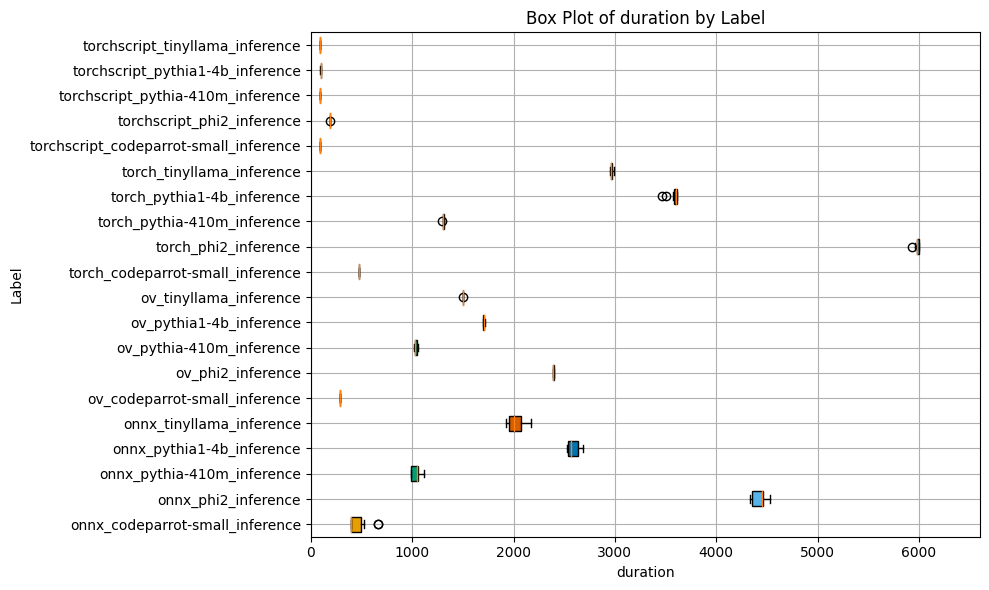

In [117]:

#combined_df = time_plot

# Define some colors for the boxes
colors = ['blue', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'orange', 'yellow', 'cyan']
colors=["#E69F00", "#56B4E9", "#009E73", "#0072B2", "#D55E00", "#CC79A7", "#F0E442"]
colors = colors[:num_models]

# Make the color list cyclic in case there are more groups than colors
color_cycle = itertools.cycle(colors)

# Generate box plots
for variable in variables_to_plot:
    plt.figure(figsize=(10, 6))
    
    # Group data by 'label'
    #plot_df = combined_df[ combined_df['label_time'].str.endswith('inference', na=False) ]
    plot_df = time_inference_df
    
    grouped = plot_df.groupby('label_time')
    
    # We need to know the number of groups
    num_groups = len(grouped)
    
    # Creating a box for each group
    for i, (name, group) in enumerate(grouped):
        # Plot only the part of the data for this group
        # `positions` gives the position of the box in the plot
        plt.boxplot(group[variable].dropna(), positions=[i], widths=0.6, vert=False, patch_artist=True,
                    boxprops=dict(facecolor=next(color_cycle)))  # Use cyclic color

    # Customizing plot
    plt.title(f'Box Plot of {variable} by Label')
    plt.xlabel(variable)
    plt.yticks(np.arange(num_groups), grouped.groups.keys())  # Set y-ticks to group names
    plt.ylabel('Label')
    plt.xlim([0,combined_df['duration'].max()*1.1])
    plt.grid(True)
    
    plt.tight_layout()  # Adjust layout to make room for labels
    plt.savefig(save_dir+ "duration_marks.png") if SAVE_FIGS else print(f"SAVE_FIGS:{SAVE_FIGS}")

plt.show()


In [118]:
time_inference_df.head()

,time,runtime,model,engine,model_name,start_end,file,label,duration,label_time,experiment
4,2024-06-12 03:22:07.000000,torch,pythia1-4b,NaN,NaN,NaN,runall,torch_pythia1-4b,3463.784445,torch_pythia1-4b_inference,1
7,2024-06-12 04:11:22.000000,torch,tinyllama,NaN,NaN,NaN,runall,torch_tinyllama,2951.680044,torch_tinyllama_inference,1
10,2024-06-12 04:19:16.000000,torch,codeparrot-small,NaN,NaN,NaN,runall,torch_codeparrot-small,472.671935,torch_codeparrot-small_inference,1
13,2024-06-12 04:40:51.000000,torch,pythia-410m,NaN,NaN,NaN,runall,torch_pythia-410m,1293.560613,torch_pythia-410m_inference,1
16,2024-06-12 06:19:50.000000,torch,phi2,NaN,NaN,NaN,runall,torch_phi2,5934.051351,torch_phi2_inference,1


In [119]:
time_inference_df = time_inference_df[['label','experiment','duration',]]
time_inference_df

,label,experiment,duration
4,torch_pythia1-4b,1,3463.784445
7,torch_tinyllama,1,2951.680044
10,torch_codeparrot-small,1,472.671935
13,torch_pythia-410m,1,1293.560613
16,torch_phi2,1,5934.051351
...,...,...,...
646,ov_pythia1-4b,9,1705.392279
649,ov_tinyllama,9,1500.899496
652,ov_codeparrot-small,9,286.013102
655,ov_pythia-410m,9,1025.941273


In [120]:
time_inference_df.to_csv(tables_dir+'final_inference_time_data.csv', index=False) if SAVE_TABLES else print(f"SAVE_TABLES:{SAVE_TABLES}")

In [121]:
time_inference_df = time_inference_df.drop(columns = ['experiment'])

In [122]:
# Calculate mean values for each label
df = time_inference_df
median_time_inference = df.groupby('label').median()

# Optionally, you might want to reset the index if you need 'label' as a column
median_time_inference.reset_index(inplace=True)

#median_energy_values = median_energy_values.drop(columns = ['experiment'])
median_time_inference

,label,duration
0,onnx_codeparrot-small,400.491458
1,onnx_phi2,4454.560860
2,onnx_pythia-410m,1051.423814
3,onnx_pythia1-4b,2570.591944
4,onnx_tinyllama,2000.845365
5,ov_codeparrot-small,285.900419
6,ov_phi2,2393.867481
7,ov_pythia-410m,1032.987605
8,ov_pythia1-4b,1705.546433
9,ov_tinyllama,1500.745790


In [123]:
# Split the 'label' column into 'runtime' and 'model'
median_time_inference[['runtime', 'model']] = median_time_inference['label'].str.split('_', n=1, expand=True)
median_time_inference

,label,duration,runtime,model
0,onnx_codeparrot-small,400.491458,onnx,codeparrot-small
1,onnx_phi2,4454.560860,onnx,phi2
2,onnx_pythia-410m,1051.423814,onnx,pythia-410m
3,onnx_pythia1-4b,2570.591944,onnx,pythia1-4b
4,onnx_tinyllama,2000.845365,onnx,tinyllama
5,ov_codeparrot-small,285.900419,ov,codeparrot-small
6,ov_phi2,2393.867481,ov,phi2
7,ov_pythia-410m,1032.987605,ov,pythia-410m
8,ov_pythia1-4b,1705.546433,ov,pythia1-4b
9,ov_tinyllama,1500.745790,ov,tinyllama


In [124]:
new_order= list(median_time_inference.columns[-2:]) + list(median_time_inference.columns[:-2])
# Reorder the columns by indexing in the new order
median_time_inference = median_time_inference[new_order]
median_time_inference

,runtime,model,label,duration
0,onnx,codeparrot-small,onnx_codeparrot-small,400.491458
1,onnx,phi2,onnx_phi2,4454.560860
2,onnx,pythia-410m,onnx_pythia-410m,1051.423814
3,onnx,pythia1-4b,onnx_pythia1-4b,2570.591944
4,onnx,tinyllama,onnx_tinyllama,2000.845365
5,ov,codeparrot-small,ov_codeparrot-small,285.900419
6,ov,phi2,ov_phi2,2393.867481
7,ov,pythia-410m,ov_pythia-410m,1032.987605
8,ov,pythia1-4b,ov_pythia1-4b,1705.546433
9,ov,tinyllama,ov_tinyllama,1500.745790


In [125]:
median_time_inference.to_csv(tables_dir+'median_time_inference.csv', index=False)  if SAVE_TABLES else print(f"SAVE_TABLES:{SAVE_TABLES}")


In [126]:
median_time_inference = median_time_inference.drop(columns = ['label'])

In [127]:
filename = tables_dir + 'median_time_inference.tex'
save_latex_table(median_time_inference,filename)

\begin{tabular}{llr}
\toprule
runtime & model & duration \\
\midrule
onnx & codeparrot-small & 400.491458 \\
onnx & phi2 & 4454.560860 \\
onnx & pythia-410m & 1051.423814 \\
onnx & pythia1-4b & 2570.591944 \\
onnx & tinyllama & 2000.845365 \\
ov & codeparrot-small & 285.900419 \\
ov & phi2 & 2393.867481 \\
ov & pythia-410m & 1032.987605 \\
ov & pythia1-4b & 1705.546433 \\
ov & tinyllama & 1500.745790 \\
torch & codeparrot-small & 472.177037 \\
torch & phi2 & 5983.522681 \\
torch & pythia-410m & 1306.998445 \\
torch & pythia1-4b & 3606.597118 \\
torch & tinyllama & 2963.893108 \\
torchscript & codeparrot-small & 94.470121 \\
torchscript & phi2 & 189.110978 \\
torchscript & pythia-410m & 94.378959 \\
torchscript & pythia1-4b & 96.136919 \\
torchscript & tinyllama & 94.712955 \\
\bottomrule
\end{tabular}

